# Predict Patient condition based on Drug Reviews and Recommend Best Drugs

# Business Objective:

# Importing Data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("drugsCom_raw.tsv",sep='\t')

In [3]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [4]:
df.shape

(161297, 7)

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [6]:
df.corr()

/tmp/ipykernel_1047254/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Unnamed: 0    rating  usefulCount
Unnamed: 0     1.000000  0.015185     0.016475
rating         0.015185  1.000000     0.234185
usefulCount    0.016475  0.234185     1.000000

In [7]:
df.describe()

Unnamed: 0         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [8]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

# Drop the rows which has null values


In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [13]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [14]:
# What is the most popular drug?
df['condition'].value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

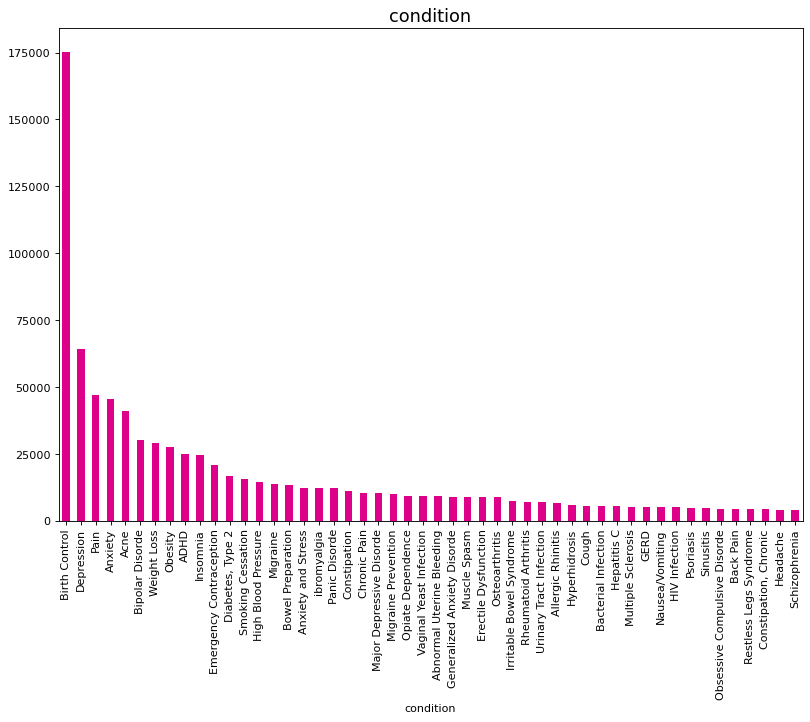

In [15]:
d=df.groupby("condition")["rating"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
d.plot.bar(color="#dd0088")
plt.title("condition",fontsize=16)
plt.show()

<AxesSubplot: >

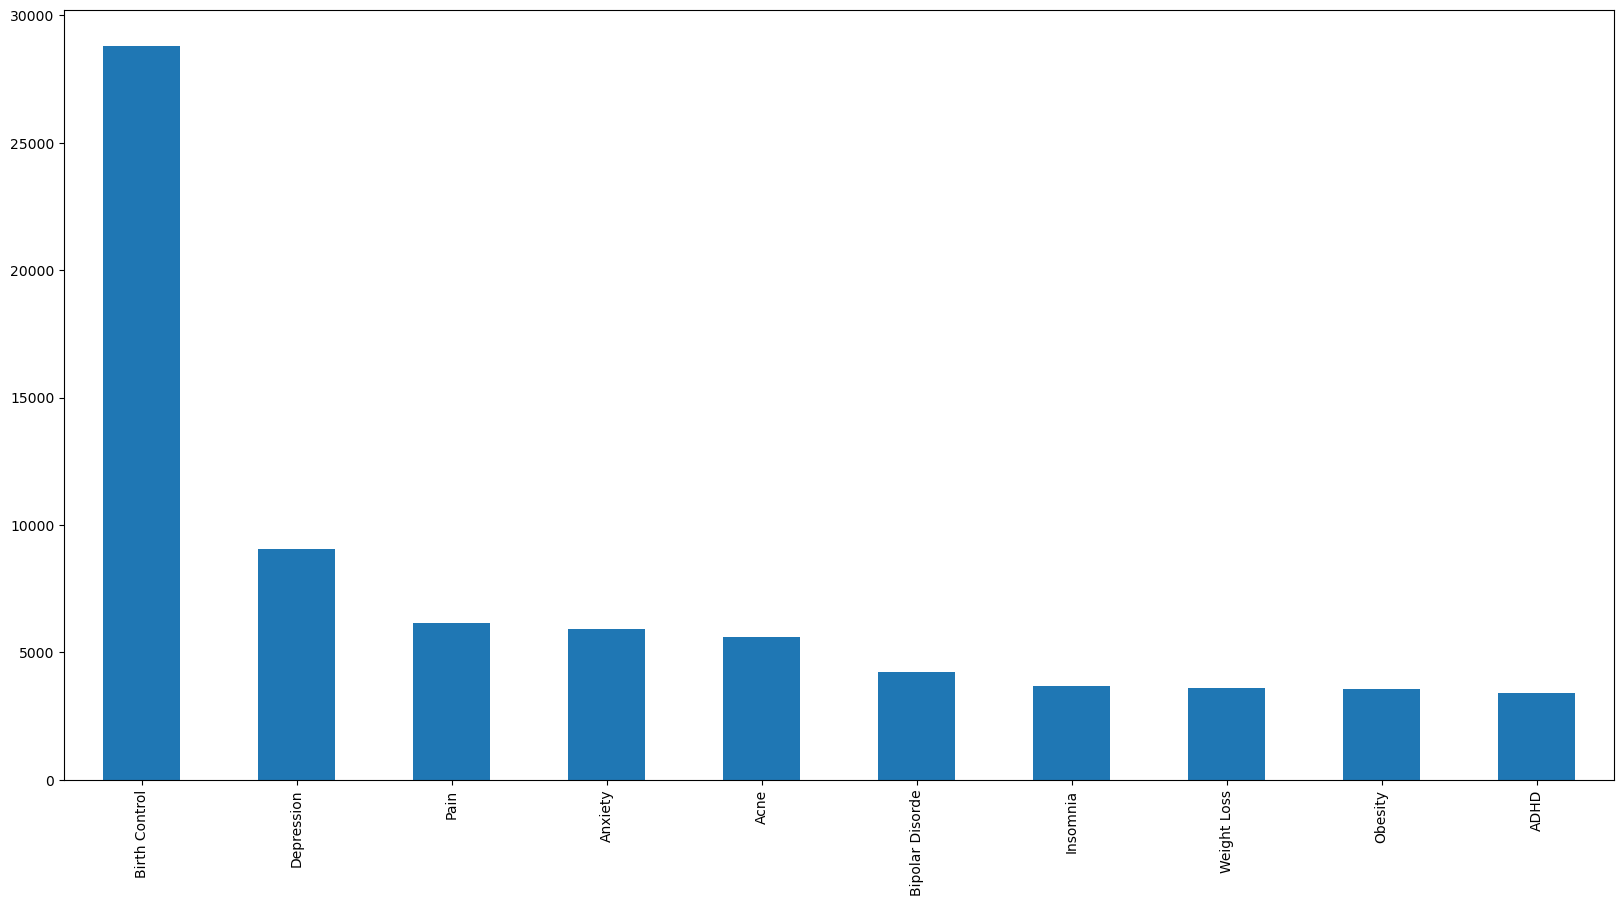

In [16]:
df['condition'].value_counts().nlargest(10).plot(kind='bar',figsize=(20,10))

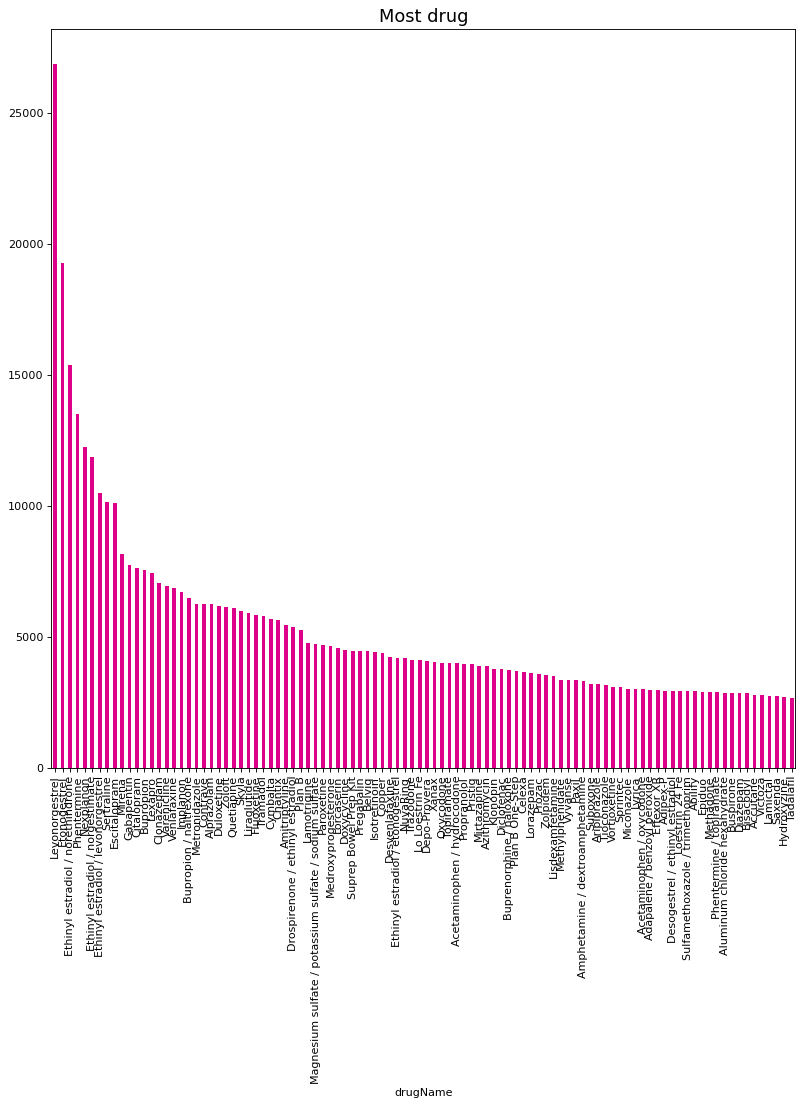

In [17]:
d1=df.groupby("drugName")["rating"].sum().nlargest(100)
plt.figure(figsize=(12,12),dpi=80)
d1.plot.bar(color="#dd0088")
plt.title("Most drug",fontsize=16)
plt.show()

In [18]:
import numpy as np
import pandas as pd
from plotnine import *


In [19]:
import plotly.express as px

In [20]:
df2 = df[df["condition"].isin(["Depression", "High Blood Pressure","Diabetes, Type 2"])]

In [21]:
df2.head()

drugName         condition  \
11  L-methylfolate        Depression   
31      Sertraline        Depression   
44     Venlafaxine        Depression   
50     Dulaglutide  Diabetes, Type 2   
67      Effexor XR        Depression   

                                               review  rating  \
11  "I have taken anti-depressants for years, with...    10.0   
31  "1 week on Zoloft for anxiety and mood swings....     8.0   
44  "my gp started me on Venlafaxine yesterday to ...     4.0   
50  "Hey Guys,  It&#039;s been 4 months since my l...    10.0   
67  "This medicine saved my life. I was at my wits...    10.0   

                date  usefulCount  
11     March 9, 2017           54  
31       May 7, 2011            3  
44    April 27, 2016            3  
50  October 24, 2017           24  
67     June 20, 2013          166

In [22]:
df2.shape

(13944, 6)

In [23]:
fig = px.pie(df2, values="rating", names="condition")
fig.show()

In [24]:
fig = px.pie(df2, values="usefulCount", names="condition")
fig.show()

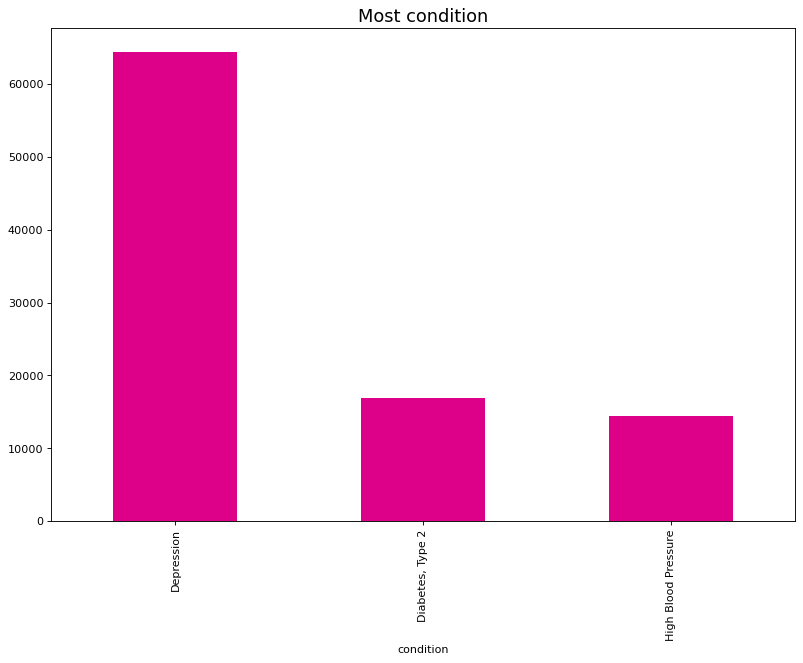

In [25]:
druge=df2.groupby("condition")["rating"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
druge.plot.bar(color="#dd0088")
plt.title("Most condition",fontsize=16)
plt.show()

# Depression Analysis

In [26]:
df3= df2[df2["condition"].isin(["Depression"])]

In [27]:
df3.head()

drugName   condition  \
11  L-methylfolate  Depression   
31      Sertraline  Depression   
44     Venlafaxine  Depression   
67      Effexor XR  Depression   
81      Wellbutrin  Depression   

                                               review  rating  \
11  "I have taken anti-depressants for years, with...    10.0   
31  "1 week on Zoloft for anxiety and mood swings....     8.0   
44  "my gp started me on Venlafaxine yesterday to ...     4.0   
67  "This medicine saved my life. I was at my wits...    10.0   
81  "Started taking it and I slept well at night a...     4.0   

                date  usefulCount  
11     March 9, 2017           54  
31       May 7, 2011            3  
44    April 27, 2016            3  
67     June 20, 2013          166  
81  January 13, 2017           15

In [28]:
df3.shape

(9069, 6)

In [29]:
df3["drugName"].value_counts()

Bupropion         549
Sertraline        459
Venlafaxine       437
Pristiq           418
Desvenlafaxine    414
                 ... 
Luvox CR            1
Vyvanse             1
Tryptophan          1
Maprotiline         1
Niravam             1
Name: drugName, Length: 105, dtype: int64

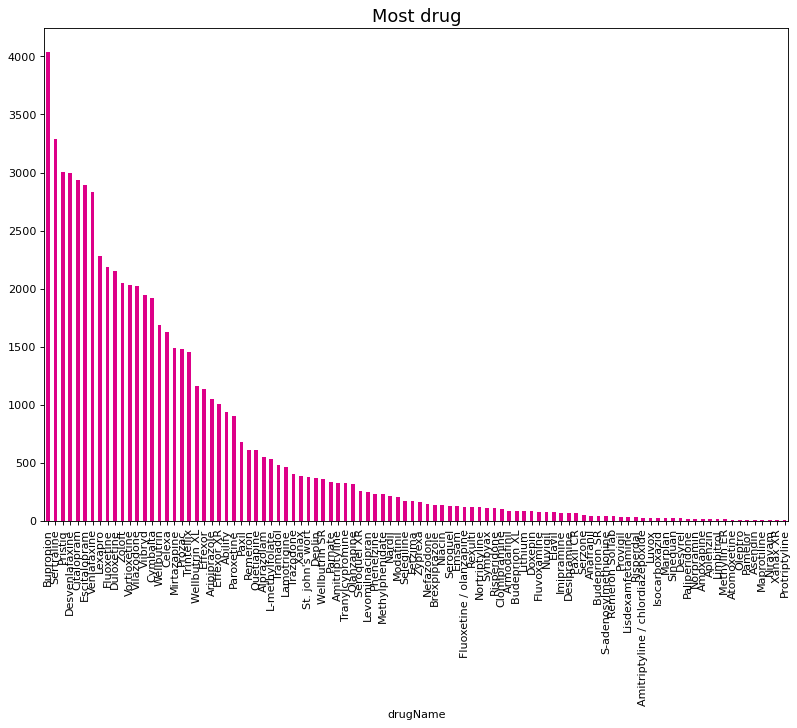

In [30]:
d3=df3.groupby("drugName")["rating"].sum().nlargest(100)
plt.figure(figsize=(12,8),dpi=80)
d3.plot.bar(color="#dd0088")
plt.title("Most drug",fontsize=16)
plt.show()

In [31]:
import plotly.express as px
 
# plotting the boxplot
fig = px.box(df3, x="drugName", y="rating")
 
# showing the plot
fig.show()

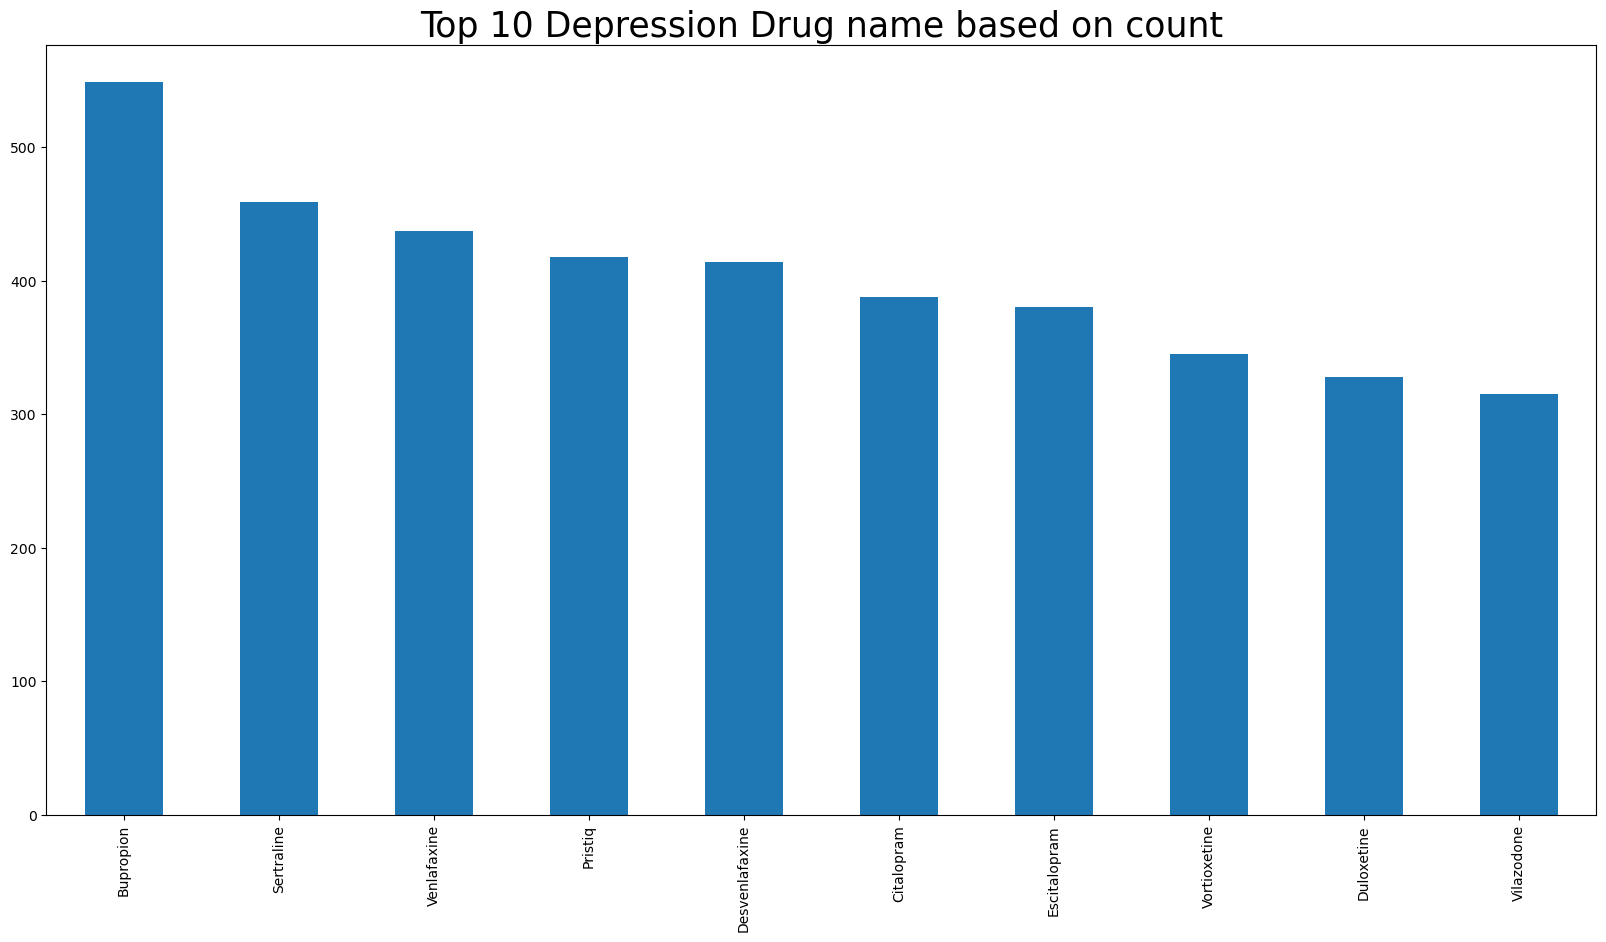

In [32]:
for i in ['drugName']:
    plt.figure(figsize=(20,10))
    df3[i].value_counts().nlargest(10).plot(kind='bar')
    plt.title("Top 10 Depression Drug name based on count",fontsize=25)
    plt.show()

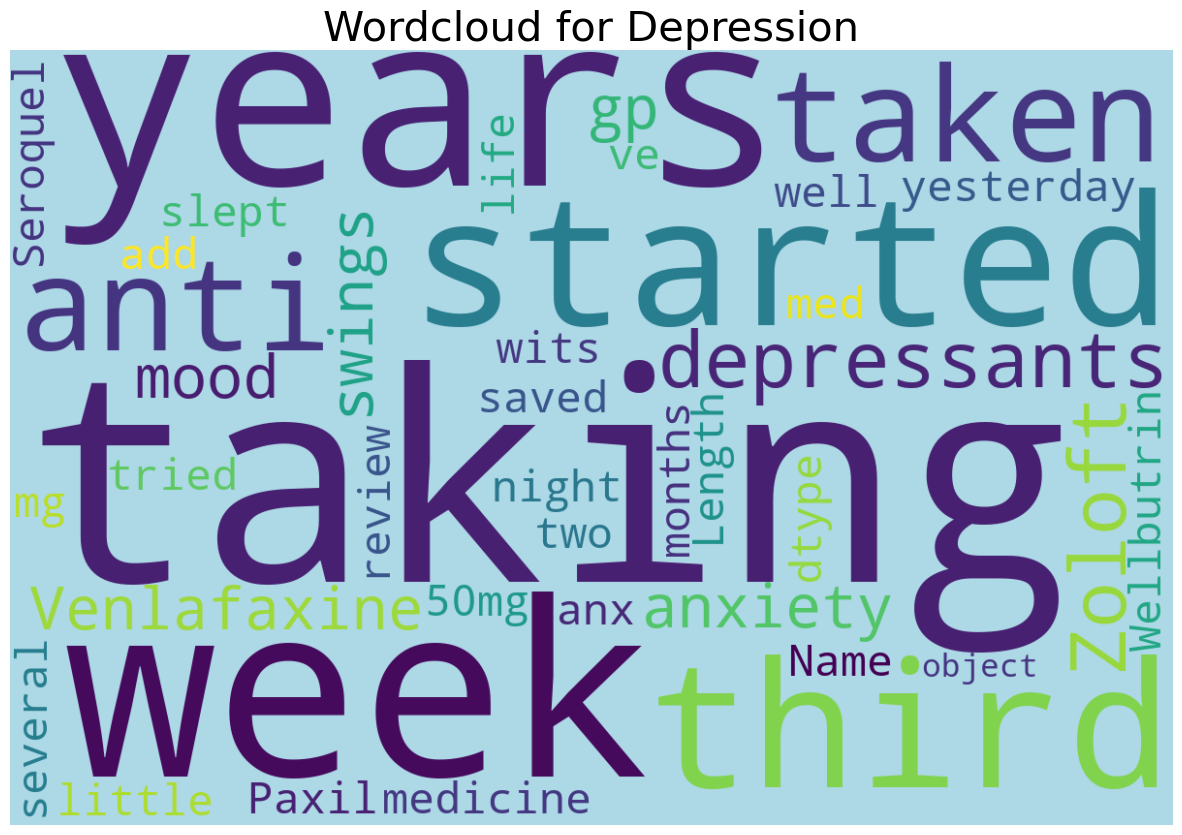

In [33]:
# making a word cloud for item categories name

from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.rcParams['figure.figsize'] = (15, 12)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightblue',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(df3['review']))


plt.title('Wordcloud for Depression', fontsize = 30)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

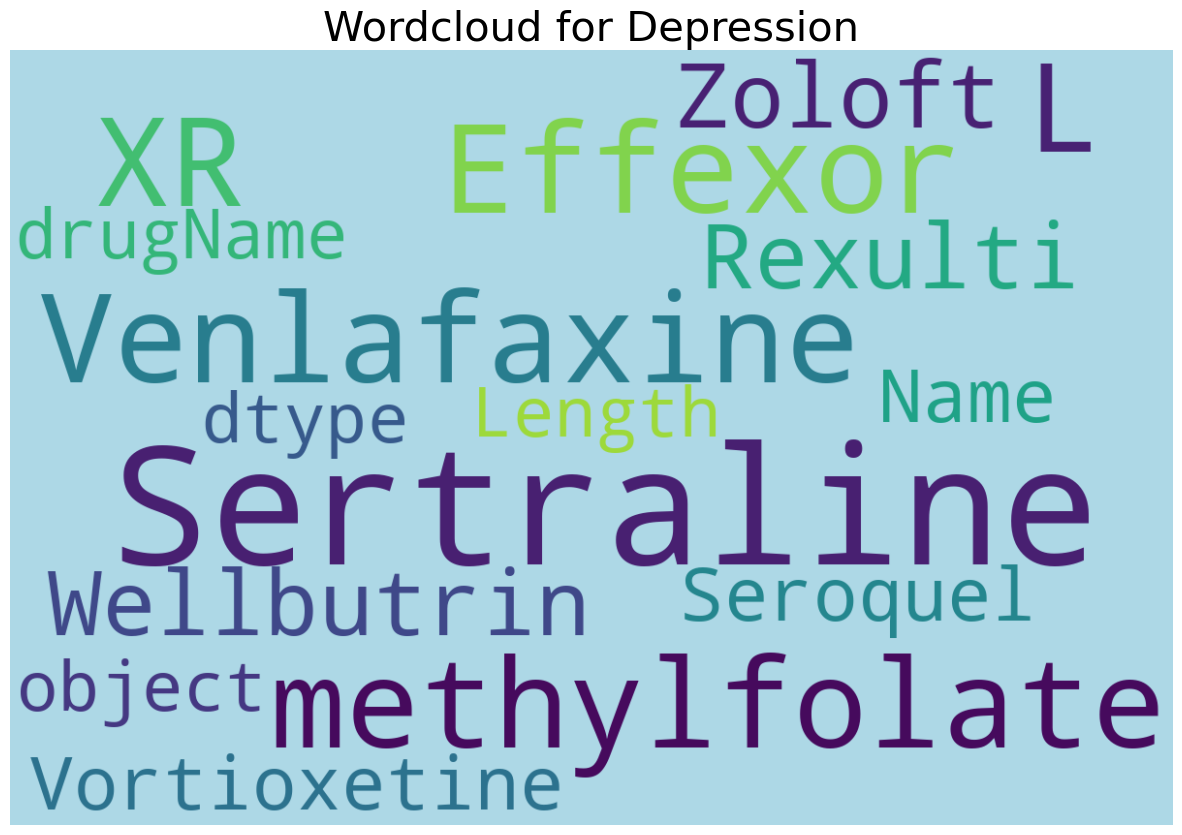

In [34]:
# making a word cloud for item categories name

from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.rcParams['figure.figsize'] = (15, 12)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightblue',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(df3['drugName']))


plt.title('Wordcloud for Depression', fontsize = 30)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

# High Blood Pressure Analysis

In [35]:
df4= df2[df2["condition"].isin(["High Blood Pressure"])]

In [36]:
df4.head()

drugName            condition  \
104  Amlodipine / olmesartan  High Blood Pressure   
185               Lisinopril  High Blood Pressure   
205               Metoprolol  High Blood Pressure   
363                 Prazosin  High Blood Pressure   
447               Metoprolol  High Blood Pressure   

                                                review  rating  \
104  "My blood pressure has been around 160/100. Do...    10.0   
185  "I&#039;m a 27 year old white male in good sha...    10.0   
205  "I have been on metoprolol er 12.5mg since Sep...     2.0   
363  "Using this for parasomnia, bph and bp. Kind o...     6.0   
447  "I took Lopressor for 24 years it worked very ...    10.0   

                 date  usefulCount  
104  January 19, 2015           10  
185  December 9, 2011           55  
205  November 3, 2016           19  
363  November 6, 2016            2  
447     June 24, 2014           55

In [37]:
df4.shape

(2321, 6)

In [38]:
df4["drugName"].value_counts()

Lisinopril                   264
Losartan                     166
Amlodipine                   153
Nebivolol                    110
Bystolic                      99
                            ... 
Normodyne                      1
Torsemide                      1
Amlodipine / atorvastatin      1
Corzide 80 / 5                 1
Aldomet                        1
Name: drugName, Length: 140, dtype: int64

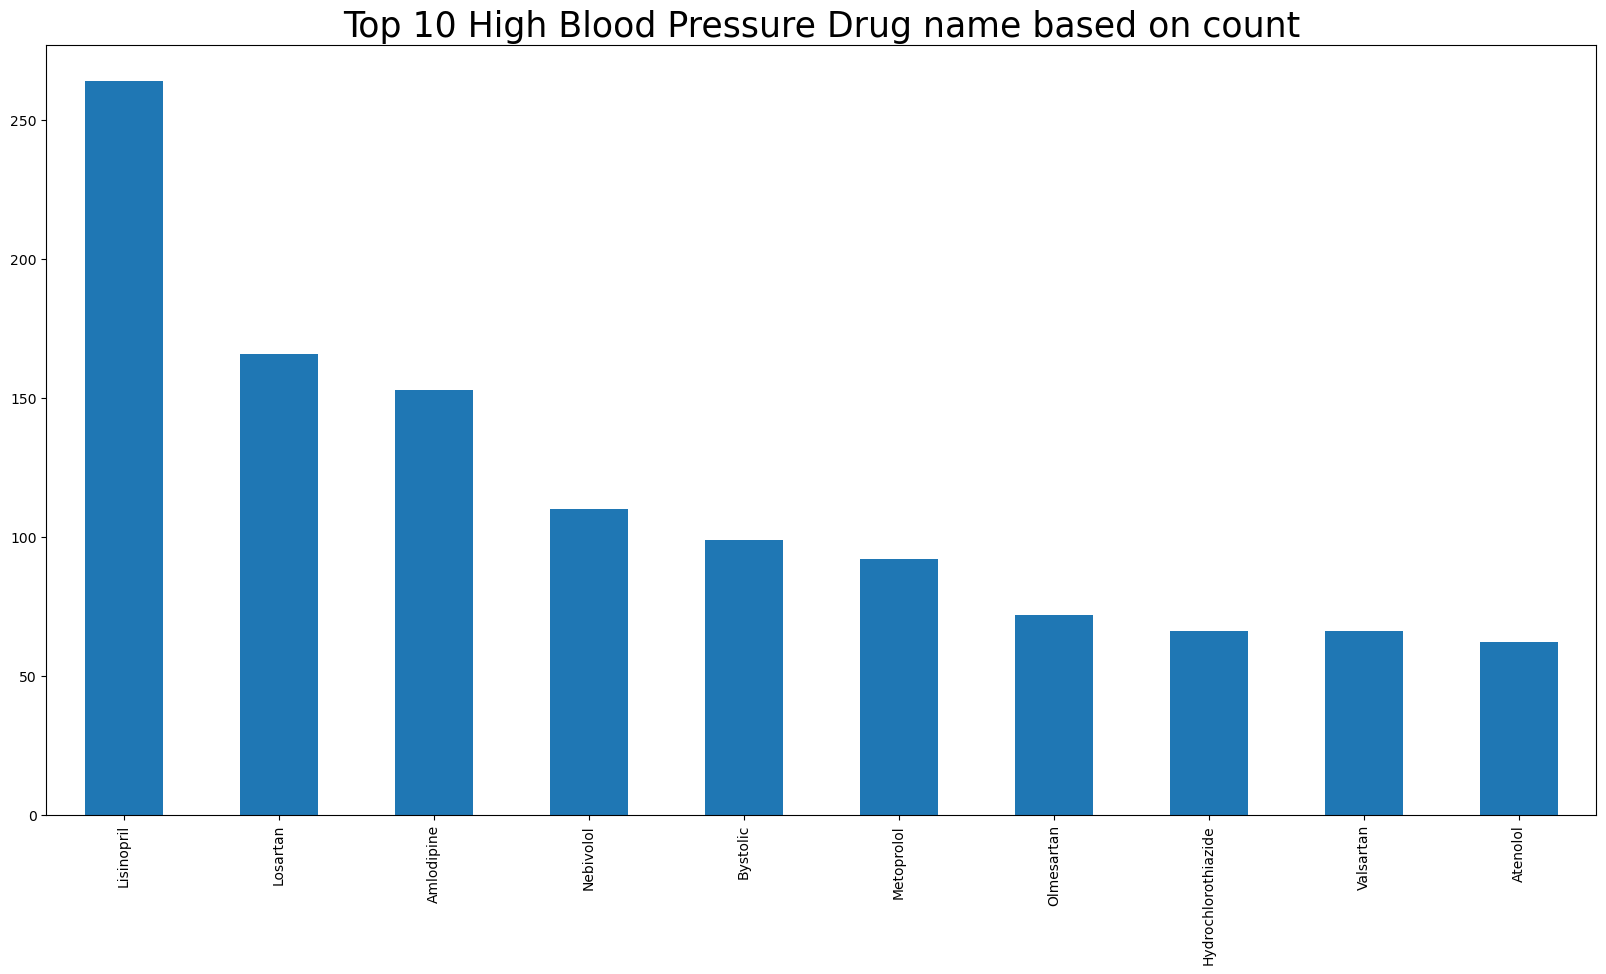

In [39]:
for i in ['drugName']:
    plt.figure(figsize=(20,10))
    df4[i].value_counts().nlargest(10).plot(kind='bar')
    plt.title("Top 10 High Blood Pressure Drug name based on count",fontsize=25)
    plt.show()

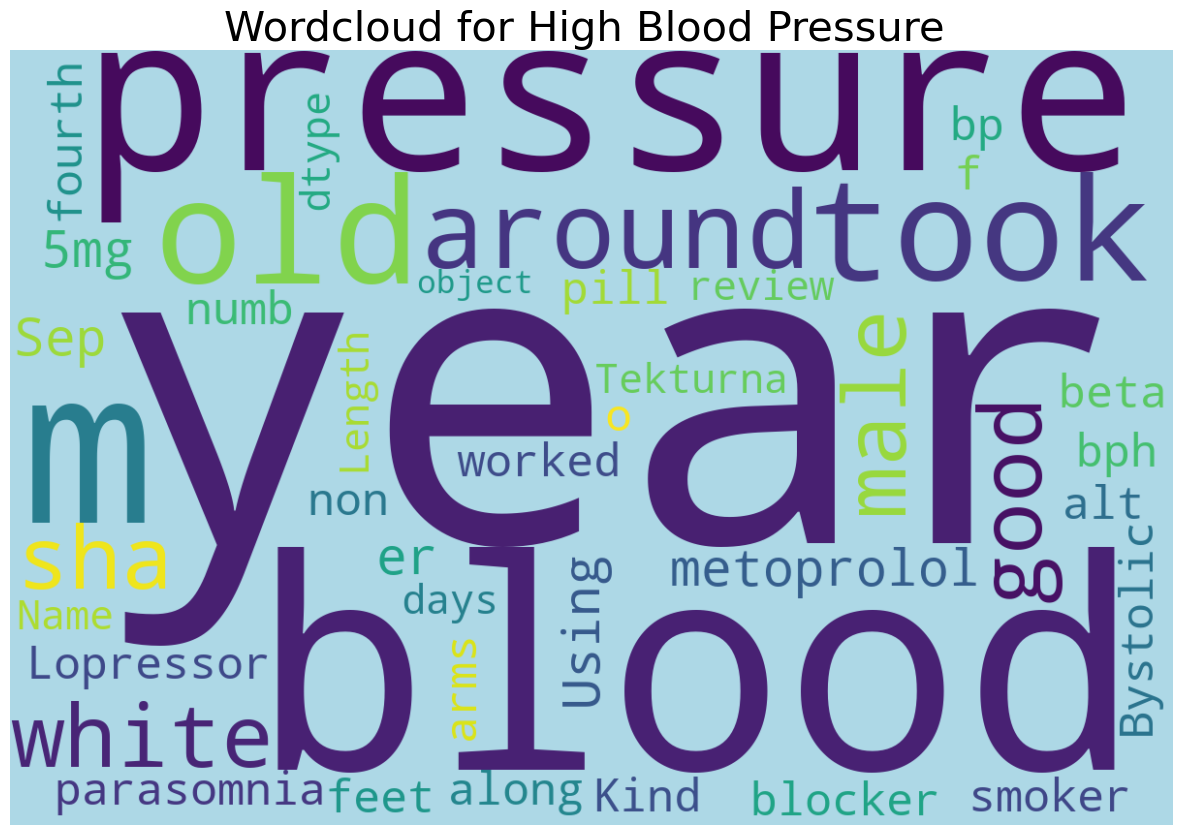

In [40]:
# making a word cloud for item categories name

from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.rcParams['figure.figsize'] = (15, 12)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightblue',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(df4['review']))


plt.title('Wordcloud for High Blood Pressure ', fontsize = 30)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

# "Diabetes, Type 2"

In [41]:
df5= df2[df2["condition"].isin(["Diabetes, Type 2"])]

In [42]:
df5.shape

(2554, 6)

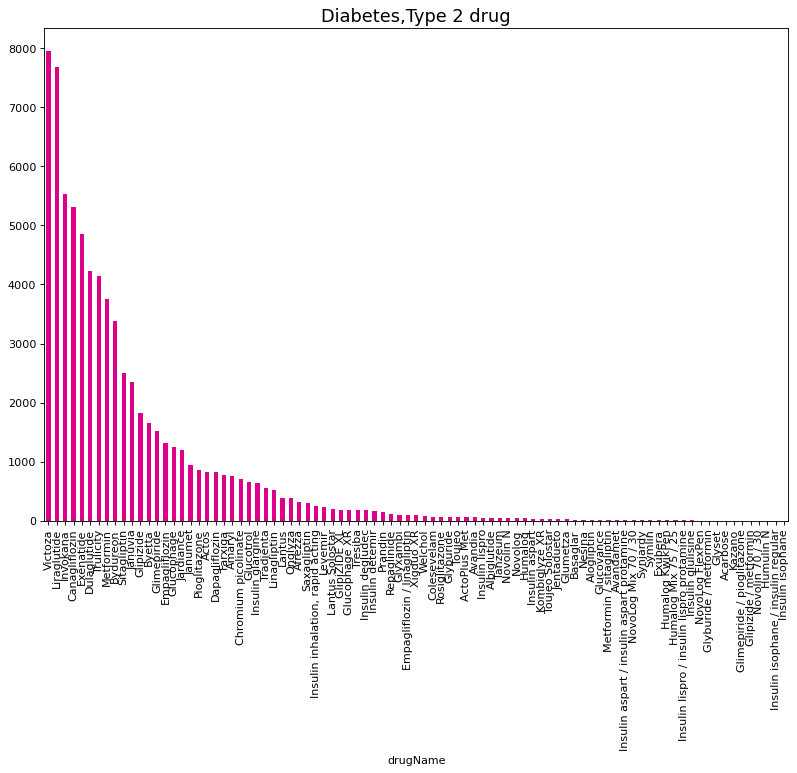

In [43]:
d5=df5.groupby("drugName")["usefulCount"].sum().nlargest(100)
plt.figure(figsize=(12,8),dpi=80)
d5.plot.bar(color="#dd0088")
plt.title("Diabetes,Type 2 drug",fontsize=16)
plt.show()

In [44]:
df5["drugName"].value_counts()

Liraglutide                   270
Victoza                       255
Dulaglutide                   231
Trulicity                     221
Exenatide                     192
                             ... 
Glimepiride / pioglitazone      1
Glucovance                      1
Synjardy                        1
Humulin N                       1
Acarbose                        1
Name: drugName, Length: 89, dtype: int64

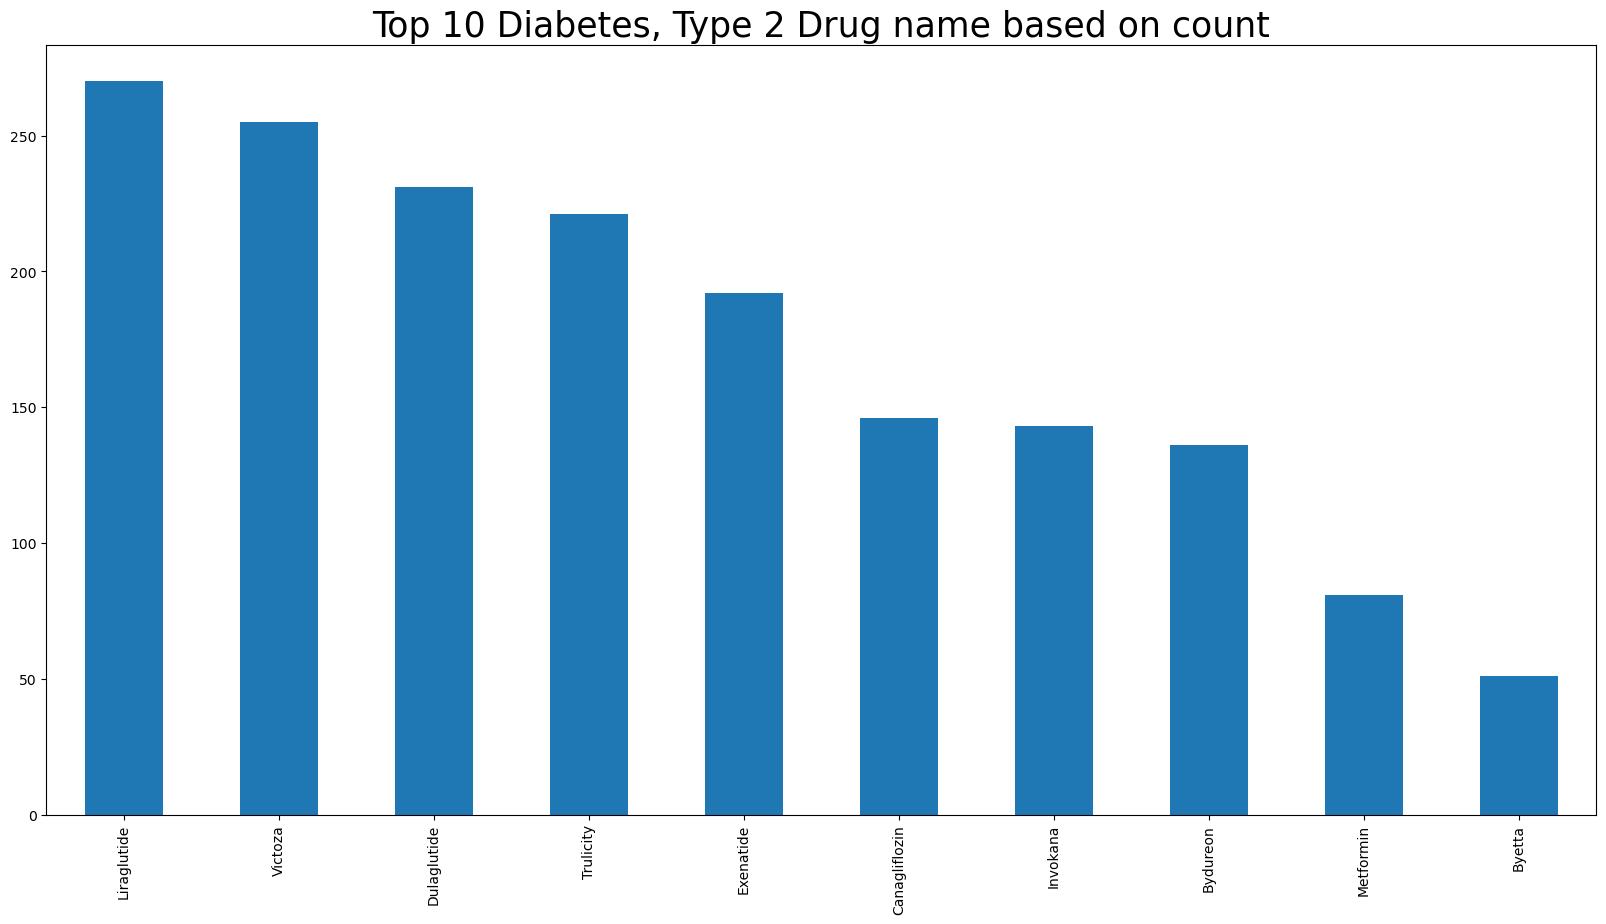

In [45]:
for i in ['drugName']:
    plt.figure(figsize=(20,10))
    df5[i].value_counts().nlargest(10).plot(kind='bar')
    plt.title("Top 10 Diabetes, Type 2 Drug name based on count",fontsize=25)
    plt.show()

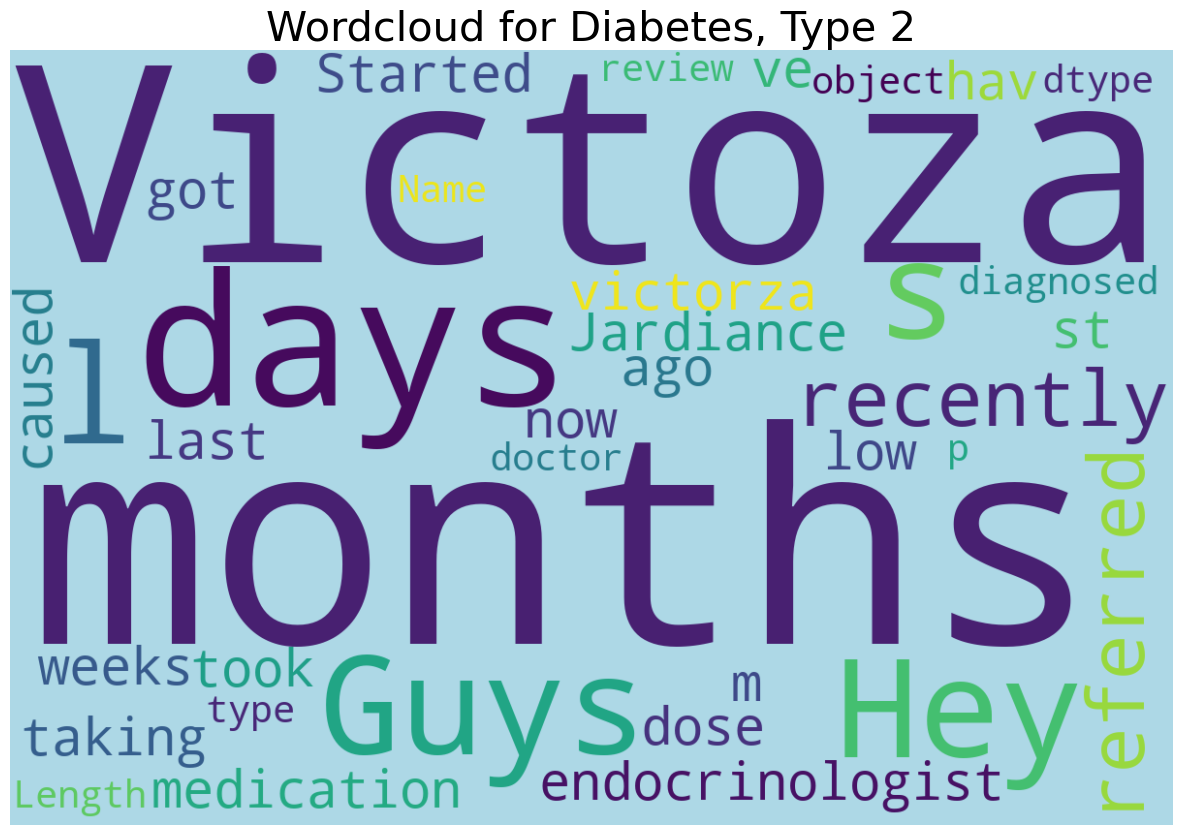

In [46]:
# making a word cloud for item categories name

from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.rcParams['figure.figsize'] = (15, 12)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightblue',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(df5['review']))


plt.title('Wordcloud for Diabetes, Type 2', fontsize = 30)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [49]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy

2023-04-12 11:14:43.306089: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [50]:
#clean the tweets with a function
def cleanReview(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
df2[' cleanReview'] = df2['review'].apply( cleanReview) #apply cleanTweet function to the Review
df2.head() #compares original tweets with cleaned REVIEW

/tmp/ipykernel_1047254/3130478752.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



drugName         condition  \
11  L-methylfolate        Depression   
31      Sertraline        Depression   
44     Venlafaxine        Depression   
50     Dulaglutide  Diabetes, Type 2   
67      Effexor XR        Depression   

                                               review  rating  \
11  "I have taken anti-depressants for years, with...    10.0   
31  "1 week on Zoloft for anxiety and mood swings....     8.0   
44  "my gp started me on Venlafaxine yesterday to ...     4.0   
50  "Hey Guys,  It&#039;s been 4 months since my l...    10.0   
67  "This medicine saved my life. I was at my wits...    10.0   

                date  usefulCount  \
11     March 9, 2017           54   
31       May 7, 2011            3   
44    April 27, 2016            3   
50  October 24, 2017           24   
67     June 20, 2013          166   

                                          cleanReview  
11  "I have taken anti-depressants for years, with...  
31  "1 week on Zoloft for anxiety and mood swings....  
44  "my gp started me on Venlafaxine yesterday to ...  
50  "Hey Guys,  It&039;s been 4 months since my la...  
67  "This medicine saved my life. I was at my wits...

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13944 entries, 11 to 161290
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   drugName      13944 non-null  object 
 1   condition     13944 non-null  object 
 2   review        13944 non-null  object 
 3   rating        13944 non-null  float64
 4   date          13944 non-null  object 
 5   usefulCount   13944 non-null  int64  
 6    cleanReview  13944 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 871.5+ KB


In [52]:
import pandas as pd
from textblob import TextBlob

In [53]:
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

In [54]:
df2['sentiment_score'] = df2[' cleanReview'].apply(get_sentiment)

/tmp/ipykernel_1047254/1136951196.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
df2.head()

drugName         condition  \
11  L-methylfolate        Depression   
31      Sertraline        Depression   
44     Venlafaxine        Depression   
50     Dulaglutide  Diabetes, Type 2   
67      Effexor XR        Depression   

                                               review  rating  \
11  "I have taken anti-depressants for years, with...    10.0   
31  "1 week on Zoloft for anxiety and mood swings....     8.0   
44  "my gp started me on Venlafaxine yesterday to ...     4.0   
50  "Hey Guys,  It&#039;s been 4 months since my l...    10.0   
67  "This medicine saved my life. I was at my wits...    10.0   

                date  usefulCount  \
11     March 9, 2017           54   
31       May 7, 2011            3   
44    April 27, 2016            3   
50  October 24, 2017           24   
67     June 20, 2013          166   

                                          cleanReview  sentiment_score  
11  "I have taken anti-depressants for years, with...         0.275000  
31  "1 week on Zoloft for anxiety and mood swings....         0.166667  
44  "my gp started me on Venlafaxine yesterday to ...        -0.136508  
50  "Hey Guys,  It&039;s been 4 months since my la...         0.103571  
67  "This medicine saved my life. I was at my wits...         0.168194

In [56]:
fig = px.pie(df2, values="sentiment_score", names="condition")
fig.show()

In [57]:
def get_sentiment_label(sentiment_score):
    if sentiment_score > 0.1:
        return 'Positive'
    elif sentiment_score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [58]:
df2['sentiment_label'] = df2['sentiment_score'].apply(get_sentiment_label)

/tmp/ipykernel_1047254/1796353422.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
df2.head()

drugName         condition  \
11  L-methylfolate        Depression   
31      Sertraline        Depression   
44     Venlafaxine        Depression   
50     Dulaglutide  Diabetes, Type 2   
67      Effexor XR        Depression   

                                               review  rating  \
11  "I have taken anti-depressants for years, with...    10.0   
31  "1 week on Zoloft for anxiety and mood swings....     8.0   
44  "my gp started me on Venlafaxine yesterday to ...     4.0   
50  "Hey Guys,  It&#039;s been 4 months since my l...    10.0   
67  "This medicine saved my life. I was at my wits...    10.0   

                date  usefulCount  \
11     March 9, 2017           54   
31       May 7, 2011            3   
44    April 27, 2016            3   
50  October 24, 2017           24   
67     June 20, 2013          166   

                                          cleanReview  sentiment_score  \
11  "I have taken anti-depressants for years, with...         0.275000   
31  "1 week on Zoloft for anxiety and mood swings....         0.166667   
44  "my gp started me on Venlafaxine yesterday to ...        -0.136508   
50  "Hey Guys,  It&039;s been 4 months since my la...         0.103571   
67  "This medicine saved my life. I was at my wits...         0.168194   

   sentiment_label  
11        Positive  
31        Positive  
44        Negative  
50        Positive  
67        Positive

In [60]:
import numpy as np
import pandas as pd
from plotnine import *


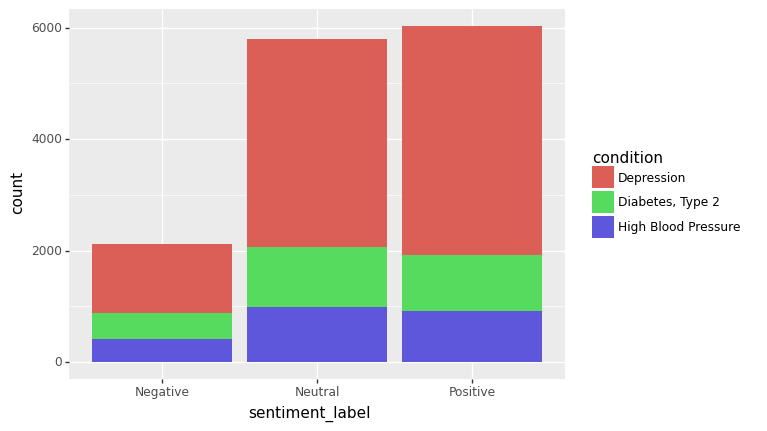

<ggplot: (8740194103037)>

In [61]:
ggplot(df2, aes(x='sentiment_label', fill = 'condition')) + \
    geom_bar(stat = 'count')

# Drug Name Analysis

In [62]:
df6= df2[df2["drugName"].isin(["Bupropion","Sertraline","Desvenlafaxine"])]

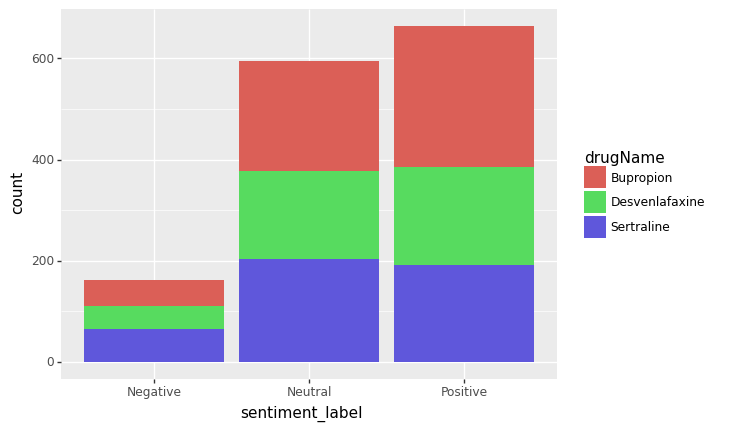

<ggplot: (8740193944369)>

In [63]:
ggplot(df6, aes(x='sentiment_label', fill = 'drugName')) + \
    geom_bar(stat = 'count')

# we plot the countplot for the Year,Month and day wise distribution of reviews

In [64]:
 #converting the date into datetime format
df2['date'] = pd.to_datetime(df2['date'], errors = 'coerce')

# extracting year from date
df2['Year'] = df2['date'].dt.year

# extracting the month from the date
df2['month'] = df2['date'].dt.month
# extracting the days from the date
df2['day'] = df2['date'].dt.day

/tmp/ipykernel_1047254/500220145.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1047254/500220145.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1047254/500220145.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

In [65]:
df2.head()

drugName         condition  \
11  L-methylfolate        Depression   
31      Sertraline        Depression   
44     Venlafaxine        Depression   
50     Dulaglutide  Diabetes, Type 2   
67      Effexor XR        Depression   

                                               review  rating       date  \
11  "I have taken anti-depressants for years, with...    10.0 2017-03-09   
31  "1 week on Zoloft for anxiety and mood swings....     8.0 2011-05-07   
44  "my gp started me on Venlafaxine yesterday to ...     4.0 2016-04-27   
50  "Hey Guys,  It&#039;s been 4 months since my l...    10.0 2017-10-24   
67  "This medicine saved my life. I was at my wits...    10.0 2013-06-20   

    usefulCount                                        cleanReview  \
11           54  "I have taken anti-depressants for years, with...   
31            3  "1 week on Zoloft for anxiety and mood swings....   
44            3  "my gp started me on Venlafaxine yesterday to ...   
50           24  "Hey Guys,  It&039;s been 4 months since my la...   
67          166  "This medicine saved my life. I was at my wits...   

    sentiment_score sentiment_label  Year  month  day  
11         0.275000        Positive  2017      3    9  
31         0.166667        Positive  2011      5    7  
44        -0.136508        Negative  2016      4   27  
50         0.103571        Positive  2017     10   24  
67         0.168194        Positive  2013      6   20

In [77]:
df2.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       ' cleanReview', 'sentiment_score', 'sentiment_label', 'Year', 'month',
       'day'],
      dtype='object')

In [78]:

for i in ['Year', 'month','day']:   
    plt.figure(figsize=(10,5))
    cp=sns.countplot(df2[i],palette='winter')
    for a in cp.containers:
        cp.bar_label(a,)
    
    plt.title('The No. of Reviews each' +i,fontsize=20)
    plt.xlabel(i, fontsize = 15)
    plt.ylabel('Count of Reviews', fontsize = 15)
    plt.show()

KeyError: 0

<Figure size 1000x500 with 0 Axes>

/tmp/ipykernel_1047254/3774210671.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

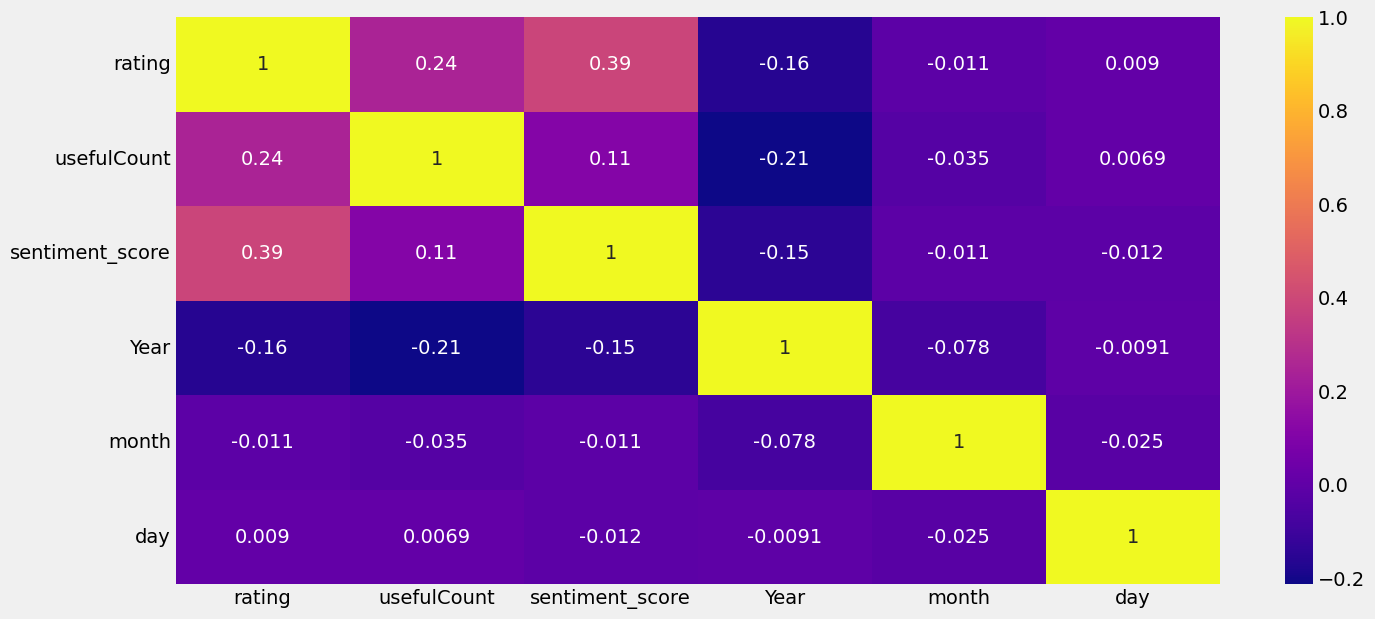

In [79]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(),annot=True,cmap='plasma')

# Declaring features & target

In [80]:
df2.head(5)

drugName         condition  \
11  L-methylfolate        Depression   
31      Sertraline        Depression   
44     Venlafaxine        Depression   
50     Dulaglutide  Diabetes, Type 2   
67      Effexor XR        Depression   

                                               review  rating       date  \
11  "I have taken anti-depressants for years, with...    10.0 2017-03-09   
31  "1 week on Zoloft for anxiety and mood swings....     8.0 2011-05-07   
44  "my gp started me on Venlafaxine yesterday to ...     4.0 2016-04-27   
50  "Hey Guys,  It&#039;s been 4 months since my l...    10.0 2017-10-24   
67  "This medicine saved my life. I was at my wits...    10.0 2013-06-20   

    usefulCount                                        cleanReview  \
11           54  "I have taken anti-depressants for years, with...   
31            3  "1 week on Zoloft for anxiety and mood swings....   
44            3  "my gp started me on Venlafaxine yesterday to ...   
50           24  "Hey Guys,  It&039;s been 4 months since my la...   
67          166  "This medicine saved my life. I was at my wits...   

    sentiment_score sentiment_label  Year  month  day  
11         0.275000        Positive  2017      3    9  
31         0.166667        Positive  2011      5    7  
44        -0.136508        Negative  2016      4   27  
50         0.103571        Positive  2017     10   24  
67         0.168194        Positive  2013      6   20

In [81]:
# select only two columns from the DataFrame
new_df2 = df2[['drugName', 'condition',' cleanReview']]

In [82]:
new_df2.head()

drugName         condition  \
11  L-methylfolate        Depression   
31      Sertraline        Depression   
44     Venlafaxine        Depression   
50     Dulaglutide  Diabetes, Type 2   
67      Effexor XR        Depression   

                                          cleanReview  
11  "I have taken anti-depressants for years, with...  
31  "1 week on Zoloft for anxiety and mood swings....  
44  "my gp started me on Venlafaxine yesterday to ...  
50  "Hey Guys,  It&039;s been 4 months since my la...  
67  "This medicine saved my life. I was at my wits...

In [83]:
import pandas as pd 
import numpy as np
import seaborn as sn
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMModel, LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import *

import warnings
warnings.simplefilter('ignore')

In [84]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/vmr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
# Pre-process data
stop_words=set(stopwords.words('english'))
stemmer= SnowballStemmer('english')

In [86]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vmr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
def preprocess_text(text):
    #Remove Punctuation and special characters
    text=re.sub(r"[^a-zA-Z0-9]", " ",text.lower())
    
    # Tokenize The text
    tokens=nltk.word_tokenize(text)
    
    #Remove the stopwords
    tokens=[token for token in tokens if token not in stop_words]
    
    #stem the tokens
    stemmed_tokens=[stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

new_df2['cleanReview']=new_df2[' cleanReview'].apply(preprocess_text)
new_df2.head()

drugName         condition  \
11  L-methylfolate        Depression   
31      Sertraline        Depression   
44     Venlafaxine        Depression   
50     Dulaglutide  Diabetes, Type 2   
67      Effexor XR        Depression   

                                          cleanReview  \
11  "I have taken anti-depressants for years, with...   
31  "1 week on Zoloft for anxiety and mood swings....   
44  "my gp started me on Venlafaxine yesterday to ...   
50  "Hey Guys,  It&039;s been 4 months since my la...   
67  "This medicine saved my life. I was at my wits...   

                                          cleanReview  
11  taken anti depress year improv most moder seve...  
31  1 week zoloft anxieti mood swing take 50mg mor...  
44  gp start venlafaxin yesterday help depress cha...  
50  hey guy 039 4 month sinc last post want give m...  
67  medicin save life wit end anti depress readi g...

# Model Building

In [88]:
# Convert the text data into numerical features using TF-IDF
vectorizer =TfidfVectorizer()
X = vectorizer.fit_transform(new_df2['cleanReview'])

y = new_df2["condition"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=90)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('X_test:',X_test.shape)

X_train: (10458, 9902)
y_train: (10458,)
X_test: (3486, 9902)
X_test: (3486, 9902)


In [89]:
X_test

<3486x9902 sparse matrix of type '<class 'numpy.float64'>'
	with 126134 stored elements in Compressed Sparse Row format>

In [90]:
y_test

16827        Diabetes, Type 2
142645             Depression
3419               Depression
13225        Diabetes, Type 2
21292              Depression
                 ...         
105015             Depression
100698       Diabetes, Type 2
67974     High Blood Pressure
17608              Depression
116667             Depression
Name: condition, Length: 3486, dtype: object

# Multinomial Naive Bayes Theoram

Training Accuracy:90.05% 
Test Accuracy:88.64% 
Precision: 89.95% 
Recall: 88.64% 
f1_score: 87.92% 
                     precision    recall  f1-score   support

         Depression       0.86      1.00      0.92      2265
   Diabetes, Type 2       0.98      0.75      0.85       644
High Blood Pressure       0.97      0.60      0.74       577

           accuracy                           0.89      3486
          macro avg       0.94      0.78      0.84      3486
       weighted avg       0.90      0.89      0.88      3486



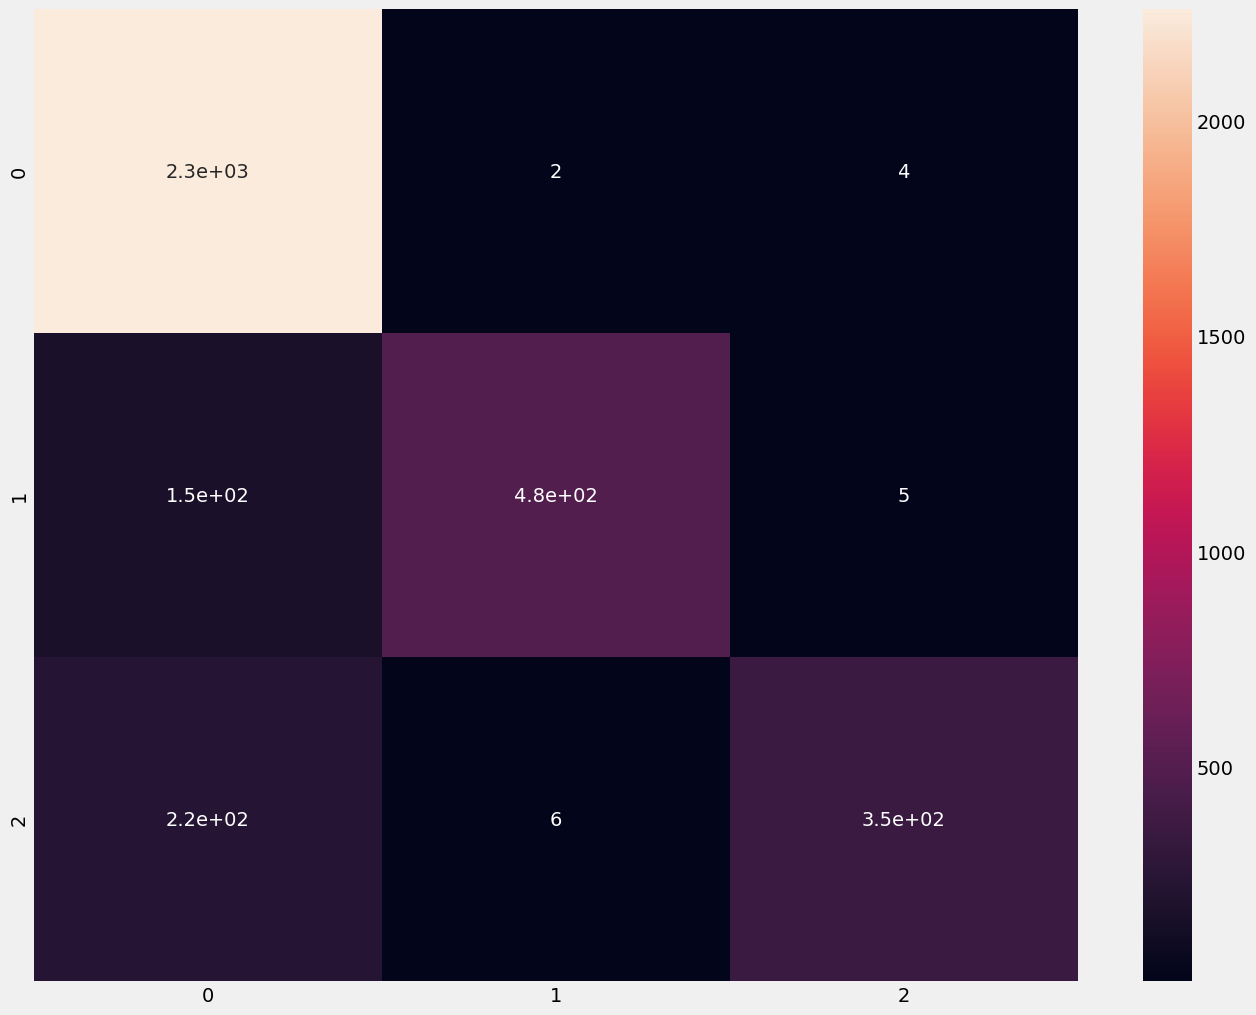

In [91]:
# Train the naive model
model_m=MultinomialNB()
model_m.fit(X_train,y_train)

# Evaluate Model
y_pred_m=model_m.predict(X_test)
y_pred_mt=model_m.predict(X_train)

accuracy_n=accuracy_score(y_test,y_pred_m)*100

print('Training Accuracy:{:.2f}% '.format(accuracy_score(y_train,y_pred_mt)*100))
print('Test Accuracy:{:.2f}% '.format(accuracy_n))

print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred_m,average='weighted')*100))
print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred_m,average='weighted')*100))
print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred_m,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_m),annot=True)
print(classification_report(y_test,y_pred_m))
 

# Logistic Model

Accuracy: 88.64% 
Precision: 89.95% 
Recall: 88.64% 
f1_score: 87.92% 
                     precision    recall  f1-score   support

         Depression       0.86      1.00      0.92      2265
   Diabetes, Type 2       0.98      0.75      0.85       644
High Blood Pressure       0.97      0.60      0.74       577

           accuracy                           0.89      3486
          macro avg       0.94      0.78      0.84      3486
       weighted avg       0.90      0.89      0.88      3486



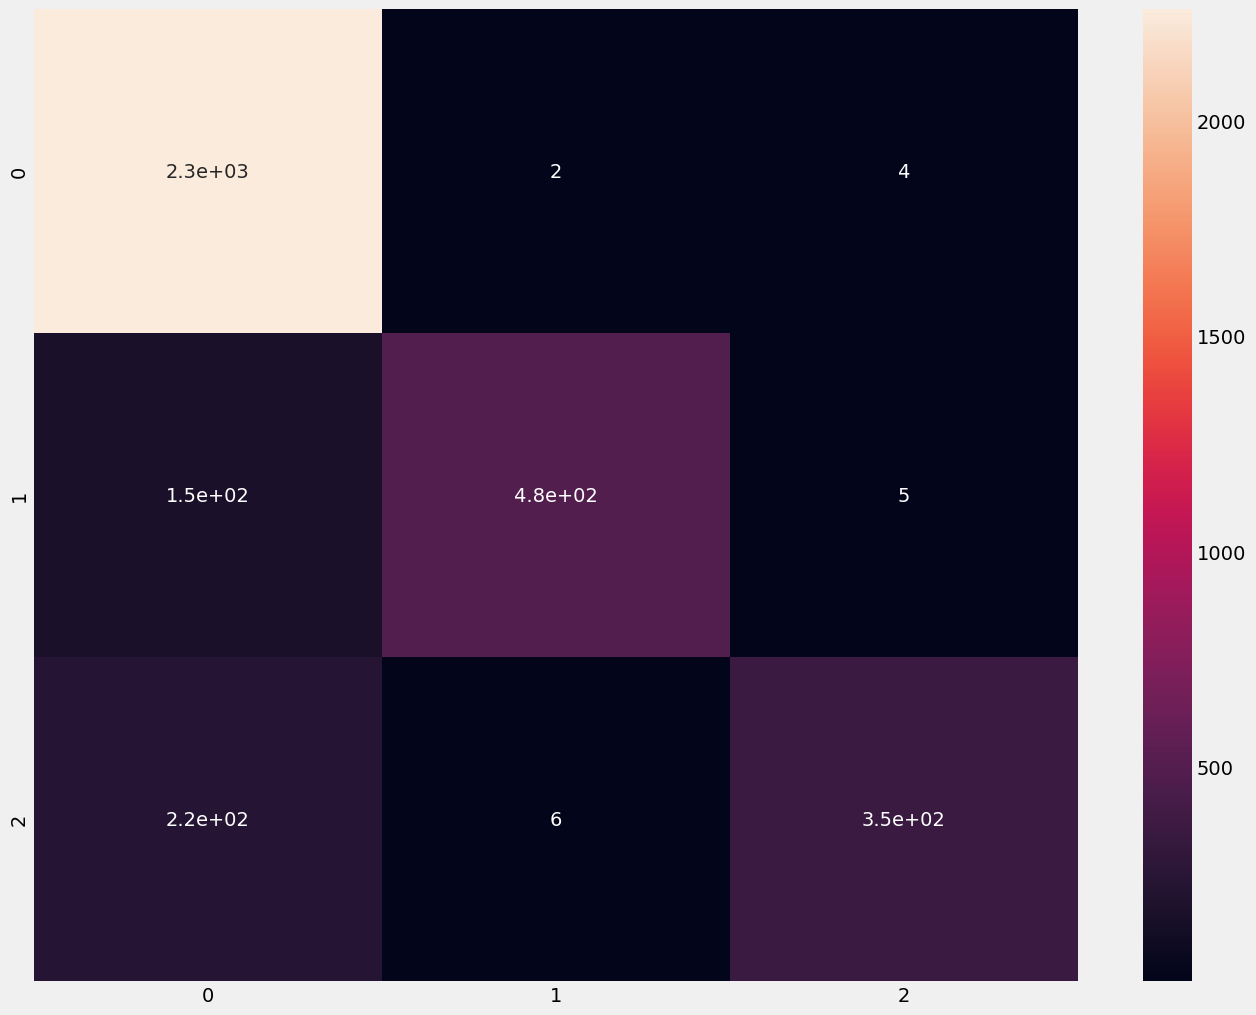

In [92]:
# Train the Logistics model
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

# Evaluate Model
y_pred_lr=model_m.predict(X_test)
accuracy_lr=accuracy_score(y_test,y_pred_lr)*100

print('Accuracy: {:.2f}% '.format(accuracy_lr))
print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred_lr,average='weighted')*100))
print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred_lr,average='weighted')*100))
print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred_lr,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_lr),annot=True)
print(classification_report(y_test,y_pred_lr))
 

# Support Vector Machine

Test Accuracy:95.75% 
Precision: 95.81% 
Recall: 95.75% 
f1_score: 95.69% 
                     precision    recall  f1-score   support

         Depression       0.95      0.99      0.97      2265
   Diabetes, Type 2       0.98      0.92      0.95       644
High Blood Pressure       0.96      0.86      0.91       577

           accuracy                           0.96      3486
          macro avg       0.96      0.92      0.94      3486
       weighted avg       0.96      0.96      0.96      3486



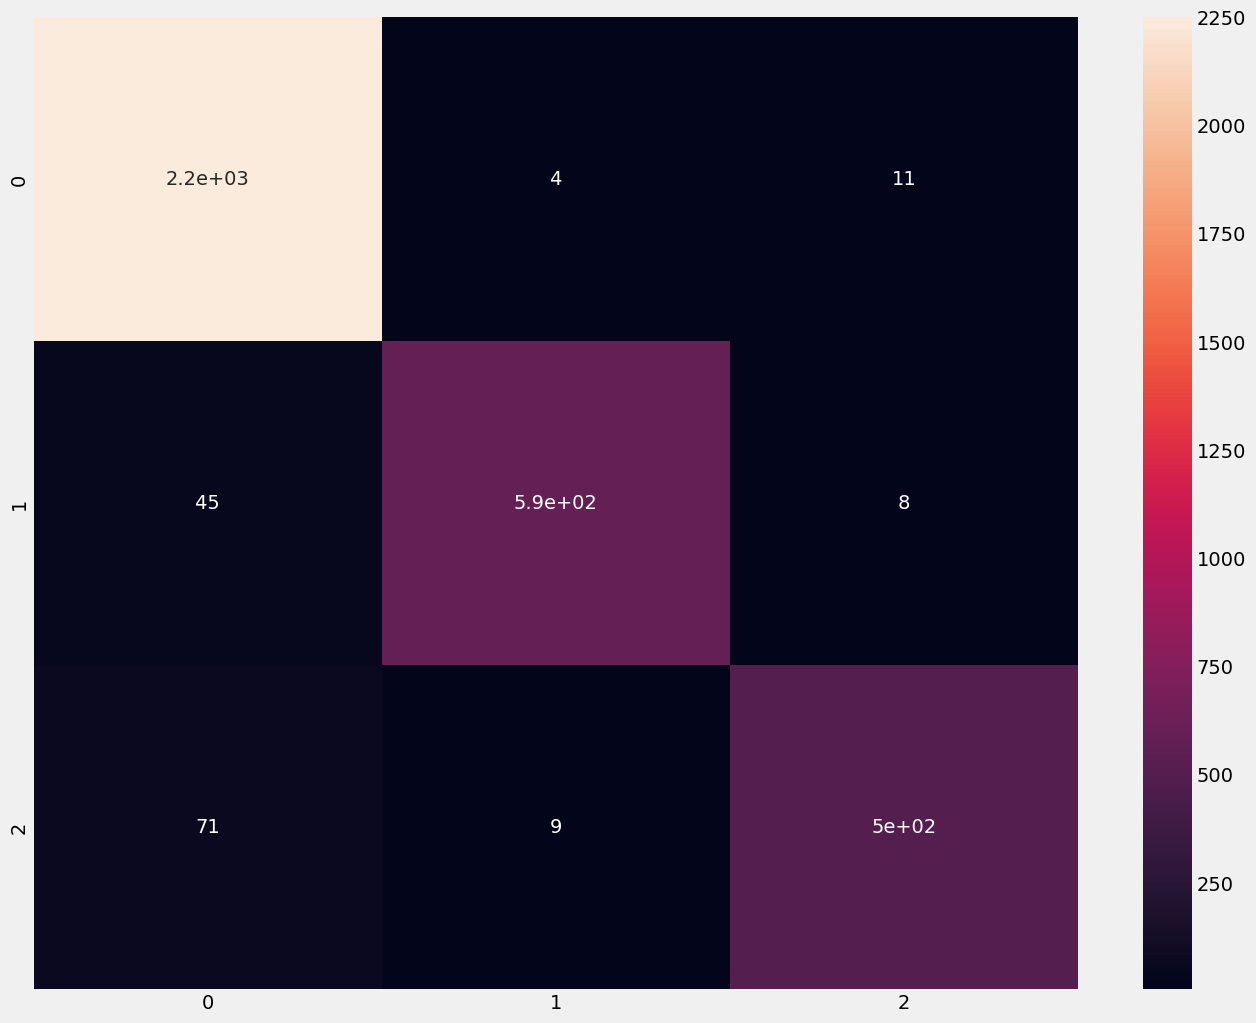

In [93]:
# Train the SVC model
model_s=SVC()
model_s.fit(X_train,y_train)

# Evaluate Model
y_pred_s=model_s.predict(X_test)

accuracy_svc=accuracy_score(y_test,y_pred_s)*100

print('Test Accuracy:{:.2f}% '.format(accuracy_svc))
print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred_s,average='weighted')*100))
print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred_s,average='weighted')*100))
print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred_s,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_s),annot=True)
print(classification_report(y_test,y_pred_s))

# Decision Tree

Accuracy: 85.14% 
Precision: 87.06% 
Recall: 85.14% 
f1_score: 83.90% 
                     precision    recall  f1-score   support

         Depression       0.82      0.99      0.90      2265
   Diabetes, Type 2       0.98      0.52      0.68       644
High Blood Pressure       0.94      0.66      0.77       577

           accuracy                           0.85      3486
          macro avg       0.91      0.73      0.79      3486
       weighted avg       0.87      0.85      0.84      3486



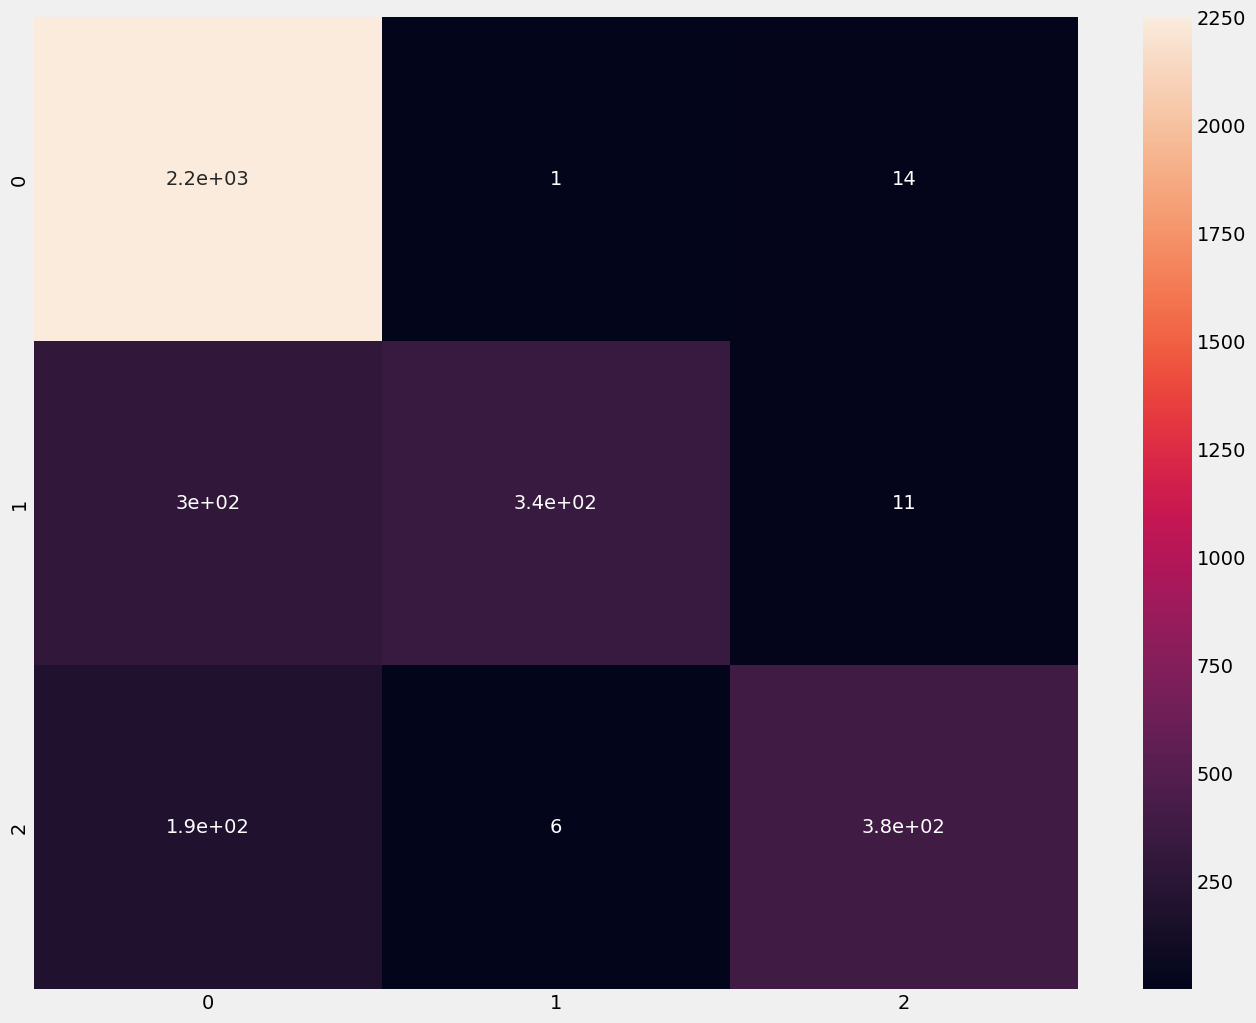

In [94]:
# Train the decision tree model
model_dt=DecisionTreeClassifier(criterion="entropy",random_state=45,max_depth=5)
model_dt.fit(X_train,y_train)

# Evaluate Model
y_pred_dt=model_dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,y_pred_dt)*100

print('Accuracy: {:.2f}% '.format(accuracy_dt))
print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred_dt,average='weighted')*100))
print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred_dt,average='weighted')*100))
print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred_dt,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_dt),annot=True)
print(classification_report(y_test,y_pred_dt))
 

# Random Forest with Ensemble Technique

Accuracy: 95.52% 
Precision: 95.65% 
Recall: 95.52% 
f1_score: 95.45% 
                     precision    recall  f1-score   support

         Depression       0.94      0.99      0.97      2265
   Diabetes, Type 2       0.98      0.91      0.95       644
High Blood Pressure       0.98      0.85      0.91       577

           accuracy                           0.96      3486
          macro avg       0.97      0.92      0.94      3486
       weighted avg       0.96      0.96      0.95      3486



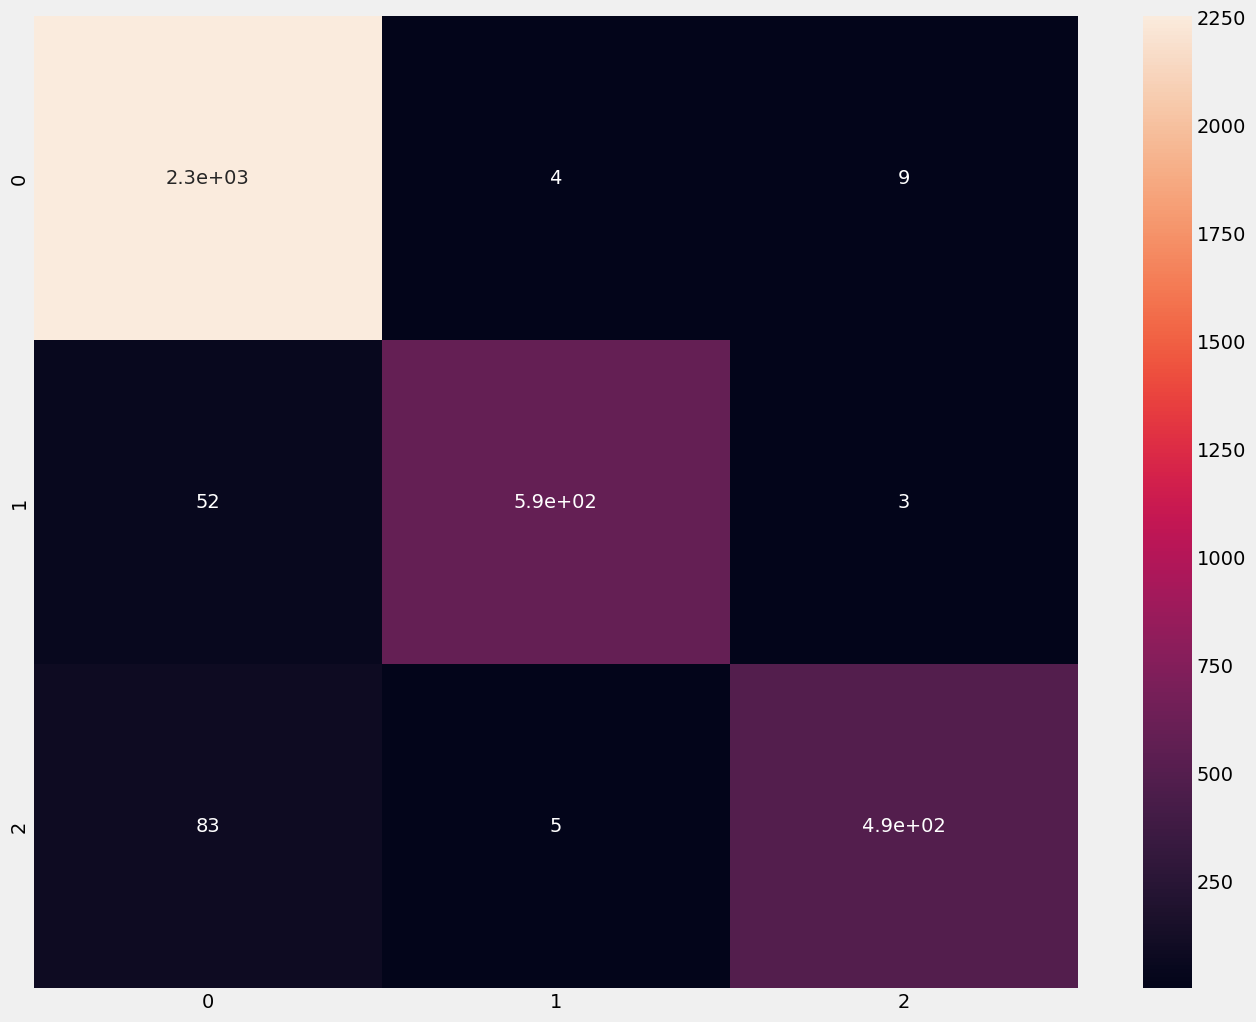

In [95]:
# Train the Ensemble (Random Forest) model
model_en=RandomForestClassifier()
model_en.fit(X_train,y_train)

# Evaluate Model
y_pred_en=model_en.predict(X_test)
accuracy_en=accuracy_score(y_test,y_pred_en)*100

print('Accuracy: {:.2f}% '.format(accuracy_en))
print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred_en,average='weighted')*100))
print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred_en,average='weighted')*100))
print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred_en,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_en),annot=True)
print(classification_report(y_test,y_pred_en))
 

# Gradient Boosting model

Accuracy: 92.86% 
Precision: 93.25% 
Recall: 92.86% 
f1_score: 92.63% 
                     precision    recall  f1-score   support

         Depression       0.91      1.00      0.95      2265
   Diabetes, Type 2       0.98      0.83      0.90       644
High Blood Pressure       0.97      0.77      0.86       577

           accuracy                           0.93      3486
          macro avg       0.95      0.87      0.90      3486
       weighted avg       0.93      0.93      0.93      3486



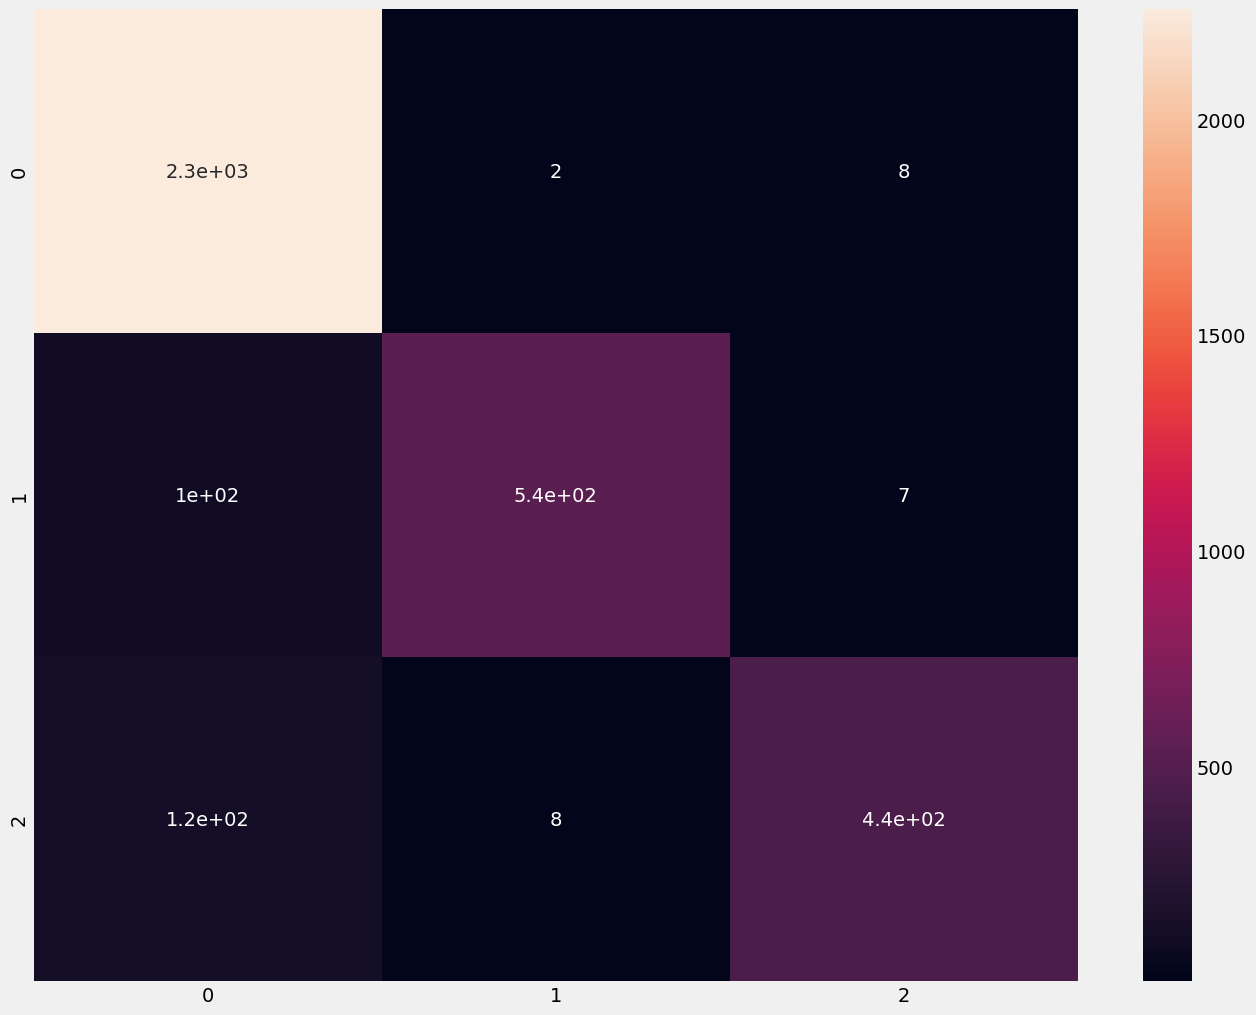

In [96]:
# Train the Gradient Boosting model
model_gb=GradientBoostingClassifier()
model_gb.fit(X_train,y_train)

# Evaluate Model
y_pred_gb=model_gb.predict(X_test)
accuracy_gb=accuracy_score(y_test,y_pred_gb)*100

print('Accuracy: {:.2f}% '.format(accuracy_gb))
print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred_gb,average='weighted')*100))
print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred_gb,average='weighted')*100))
print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred_gb,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_gb),annot=True)
print(classification_report(y_test,y_pred_gb))
 

# Light Gradient Boosting classifier model

Accuracy:95.75% 
Precision:95.73% 
Recall:95.75% 
f1_score:95.72% 
                     precision    recall  f1-score   support

         Depression       0.96      0.98      0.97      2265
   Diabetes, Type 2       0.96      0.92      0.94       644
High Blood Pressure       0.93      0.89      0.91       577

           accuracy                           0.96      3486
          macro avg       0.95      0.93      0.94      3486
       weighted avg       0.96      0.96      0.96      3486



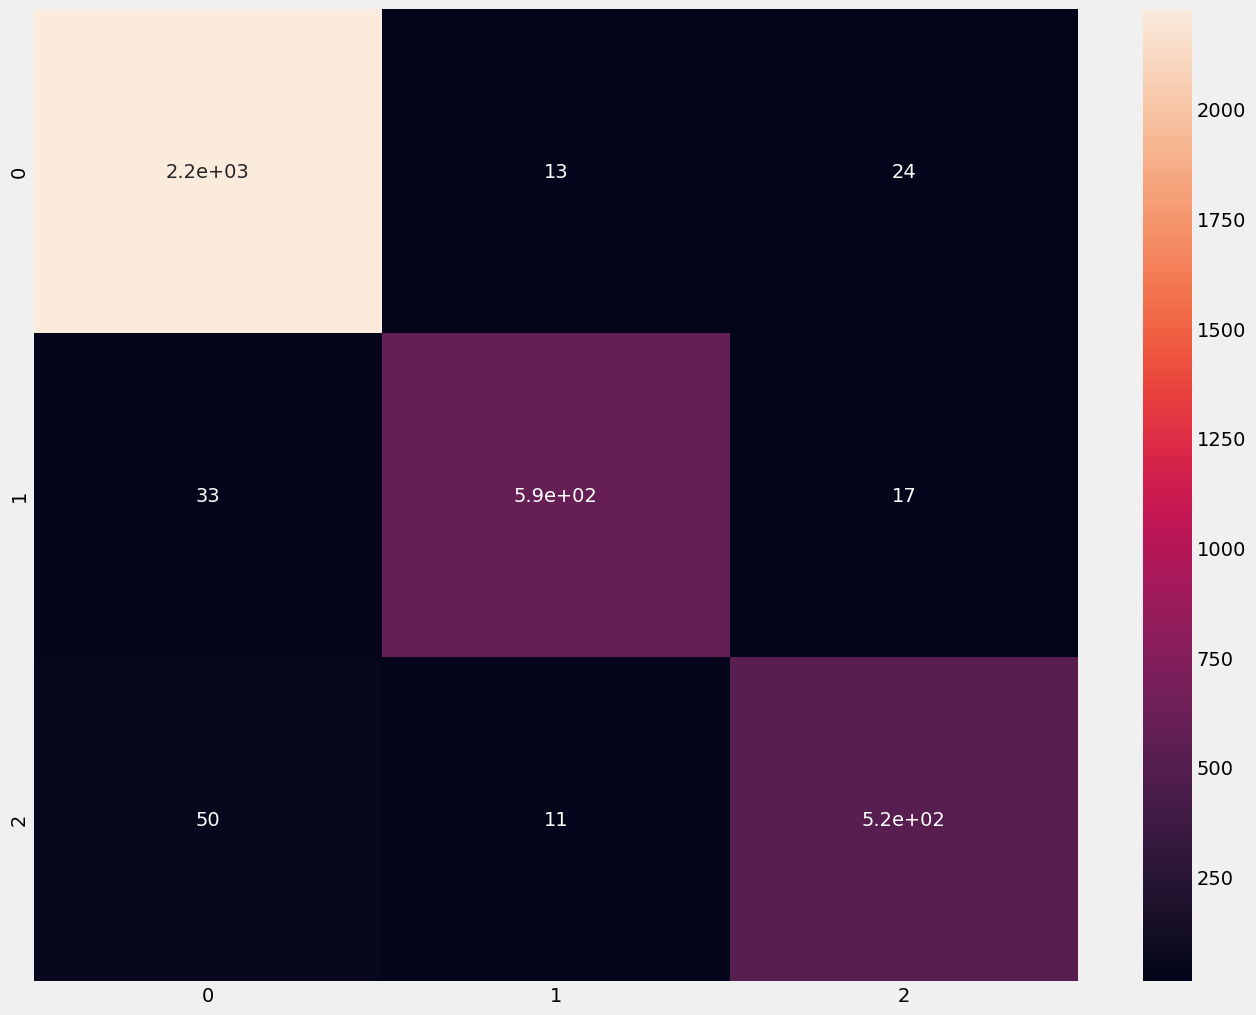

In [97]:
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Evaluate Model
y_pred_clf=model.predict(X_test)
accuracy_clf=accuracy_score(y_test,y_pred_clf)*100

print('Accuracy:{:.2f}% '.format(accuracy_clf))
print('Precision:{:.2f}% '.format(precision_score(y_test,y_pred_clf,average='weighted')*100))
print('Recall:{:.2f}% '.format(recall_score(y_test,y_pred_clf,average='weighted')*100))
print('f1_score:{:.2f}% '.format(f1_score(y_test,y_pred_clf,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_clf),annot=True)
print(classification_report(y_test,y_pred_clf))
 

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [99]:
compare={"Model Name":['MultinomialNB','GradientBoosting','DecisionTree','SVC','LogisticRegression','RandomForest','LGBMClassifier'],
        "Accuracy Score":[accuracy_n,accuracy_gb,accuracy_dt,accuracy_svc,accuracy_lr,accuracy_en,accuracy_clf]}
barp=pd.DataFrame(compare)
print(barp)


           Model Name  Accuracy Score
0       MultinomialNB       88.640275
1    GradientBoosting       92.857143
2        DecisionTree       85.140562
3                 SVC       95.754446
4  LogisticRegression       88.640275
5        RandomForest       95.524957
6      LGBMClassifier       95.754446


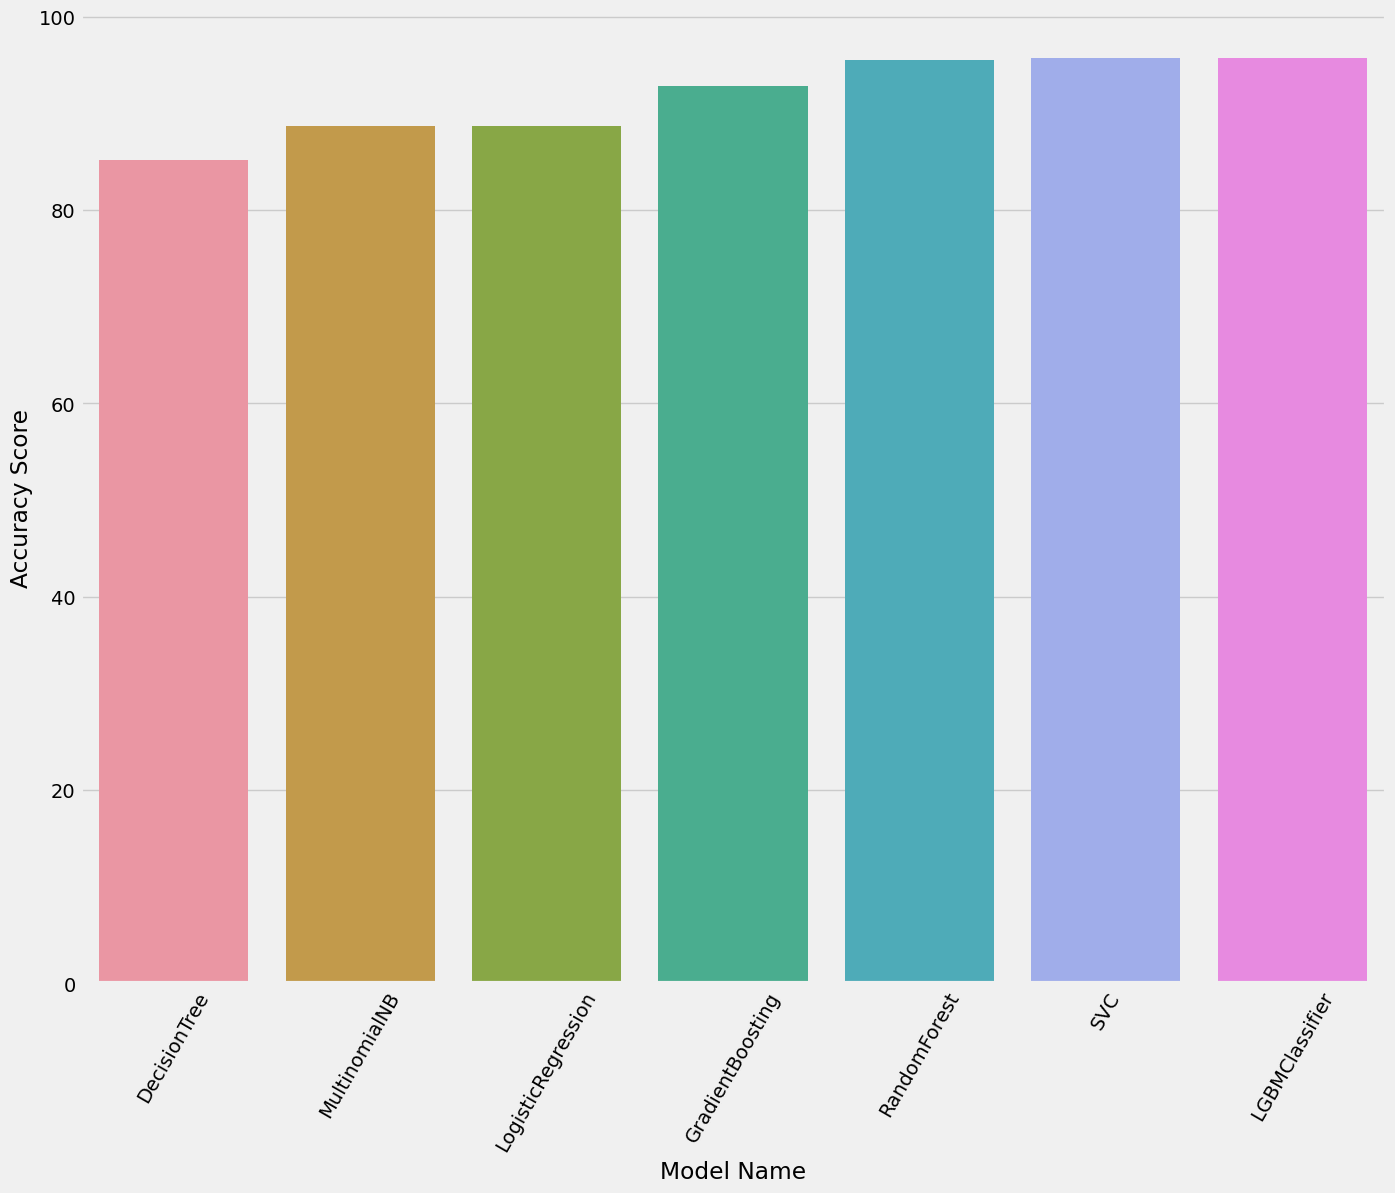

In [100]:
import matplotlib.pyplot as plt
barp.sort_values(by='Accuracy Score',inplace=True)
sn.barplot(x="Model Name",y="Accuracy Score",data=barp)
plt.xticks(rotation=60)
plt.show()

In [101]:
new_df2["condition"] =  new_df2["condition"].str.lower()
new_df2["condition"] =  new_df2["condition"].str.lower()


In [102]:
X = vectorizer.fit_transform(new_df2['cleanReview'])

y = new_df2["condition"]

In [104]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import plotly.express as px
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_learning_curves
from sklearn.preprocessing import LabelEncoder


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer, SnowballStemmer


In [105]:
def cross_val_multiple_classifiers(X, Y):
  classifiers = [MultinomialNB(), SGDClassifier(loss="modified_huber"), 
                 RandomForestClassifier(n_estimators=100), 
                 KNeighborsClassifier(n_neighbors=5)]
  labels = ['Multinomial Naive Bayes', 'SGD Classifier', 'Random Forest',  'KNN']
  clf_cv_mean = []
  clf_cv_std = []
  for clf, label in zip(classifiers, labels): 
      scores = cross_val_score(clf, X, Y, cv=4, scoring='accuracy')
      print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))

# calling multiple classifiers on the vectorized features
cross_val_multiple_classifiers(X, y)

Accuracy: 0.89 (+/- 0.01) [Multinomial Naive Bayes]
Accuracy: 0.97 (+/- 0.01) [SGD Classifier]
Accuracy: 0.96 (+/- 0.00) [Random Forest]
Accuracy: 0.90 (+/- 0.01) [KNN]


# Stochastic gradient descent

# SGD Classifier is a linear classifier (SVM, logistic regression, a.o.) optimized by the SGD. These are two different concepts. While SGD is a optimization method, Logistic Regression or linear Support Vector Machine is a machine learning algorithm/model. 

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
classifier = []
classifier.append(('standardize', StandardScaler()))
classifier.append(("model",MultinomialNB(), SGDClassifier(loss="modified_huber"), 
                 RandomForestClassifier(n_estimators=100), 
                 KNeighborsClassifier(n_neighbors=5)))

In [108]:
classifier

[('standardize', StandardScaler()),
 ('model',
  MultinomialNB(),
  SGDClassifier(loss='modified_huber'),
  RandomForestClassifier(),
  KNeighborsClassifier())]

In [109]:
model = Pipeline(classifier)
model

Pipeline(steps=[('standardize', StandardScaler()),
                ('model', MultinomialNB(), SGDClassifier(loss='modified_huber'),
                 RandomForestClassifier(), KNeighborsClassifier())])

## Model Saving

In [110]:
model

Pipeline(steps=[('standardize', StandardScaler()),
                ('model', MultinomialNB(), SGDClassifier(loss='modified_huber'),
                 RandomForestClassifier(), KNeighborsClassifier())])

In [119]:
import pickle

# Save the model as a pickle file
with open('model_s.pkl', 'wb') as f:
    pickle.dump(model_s, f)


In [120]:

import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new_df2['cleanReview'])

# Train the SVC model
model_s = SVC()
model_s.fit(X_train, y_train)

# Export the vectorizer and model_s as a pickle file
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

with open('model_s.pkl', 'wb') as file:
    pickle.dump(model_s, file)
